# Proyecto Open Data I
## Radares, y su eficiencia en Madrid
### Análisis descriptivo y exploratorio de los datos
Este cuaderno pretende enseñar el proceso de análisis los datos relativos a los radares en la CAM
_Paula Gómez Lucas_

In [1]:
# Importar librerías
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.interpolate import make_interp_spline, UnivariateSpline
from matplotlib.colors import LogNorm
import matplotlib.ticker as mtick

import matplotlib
import textwrap
from adjustText import adjust_text
import matplotlib.patches as mpatches


cmap = matplotlib.colormaps['tab20b'] # Paleta de colores

### Análisis Descriptivo de los Datos
A continuación, veremos, dataframe a dataframe, el análisis descriptivo


In [2]:
ds = {}
folder = "limpios"

for file in os.listdir(folder):
    filename = file[:-4]
    filepath = folder + "/" + file
    ds[filename] = pd.read_csv(filepath, sep=',', decimal='.', encoding='utf-8', low_memory=False)

with open('diccionarios/distritoDict.json', 'r') as file:
    distritoDict = json.load(file)

with open('diccionarios/lesividadDict.json', 'r') as file:
    lesividadDict = json.load(file)

with open('diccionarios/accidenteDict.json', 'r') as file:
    accidenteDict = json.load(file)

def get_info(filename):
    print(ds[filename].isnull().sum())
    print(ds[filename].info())

In [3]:
for key in ds.keys():
    print(key)

accidentalidad
bomberos
direcciones
estaciones
estacionesCruzadas
estacionesNombres
iluminacion
padron
radares


In [6]:
del ds['estaciones']
del ds['estacionesNombres']

In [7]:
for filename in ds.keys():
    get_info(filename)

datetime                0
num_expediente          0
fecha                   0
hora                    0
localizacion            0
cod_distrito            0
distrito                0
tipo_accidente          0
estado_meteorológico    0
tipo_vehiculo           0
tipo_persona            0
rango_edad              0
sexo                    0
cod_lesividad           0
lesividad               0
positiva_alcohol        0
positiva_droga          0
cod_accidente           0
longitud                0
latitud                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195608 entries, 0 to 195607
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   datetime              195608 non-null  object 
 1   num_expediente        195608 non-null  object 
 2   fecha                 195608 non-null  object 
 3   hora                  195608 non-null  object 
 4   localizacion          195608 non-null  

Empezando con el dataframe de actuaciones bomberos:

In [8]:
def NM(filename):
    numeric_mask = ds[filename].select_dtypes(include='number').columns
    return numeric_mask

In [9]:
ds['bomberos'][NM('bomberos')].describe()

,año,fuegos,daños_en_construccion,salvamentos_y_rescates,daños_por_agua,incidentes_diversos,salidas_sin_intervencion,servicios_varios,total,idMes
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,2021.011565,18.829607,6.993832,22.934464,8.674634,23.464919,13.937548,3.891288,98.724749,6.525829
std,1.417164,12.415372,8.492369,12.583714,6.654427,16.823995,11.402294,4.739158,50.943450,3.438322
min,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2020.000000,10.000000,2.000000,14.000000,4.000000,12.000000,6.000000,1.000000,67.000000,4.000000
50%,2021.000000,16.000000,5.000000,22.000000,7.000000,20.000000,11.000000,3.000000,95.000000,7.000000
75%,2022.000000,25.000000,9.000000,30.000000,12.000000,32.000000,20.000000,5.000000,124.000000,10.000000
max,2023.000000,92.000000,160.000000,84.000000,46.000000,145.000000,96.000000,57.000000,427.000000,12.000000


Observando las distintas actuaciones que se lleva a cabo por los equipos de bomberos de Madrid en función de la estación del año.

In [10]:
season_mapping = {
    'enero': 'INVIERNO',
    'febrero': 'INVIERNO',
    'marzo': 'INVIERNO',
    'abril': 'PRIMAVERA',
    'mayo': 'PRIMAVERA',
    'junio': 'PRIMAVERA',
    'julio': 'VERANO',
    'agosto': 'VERANO',
    'septiembre': 'VERANO',
    'octubre': 'OTOÑO',
    'noviembre': 'OTOÑO',
    'diciembre': 'OTOÑO'
}

ds['bomberos']['estacion'] = ds['bomberos']['mes'].str.lower().map(season_mapping)

print(ds['bomberos'].head())

    año    mes    distrito  fuegos  daños_en_construccion  \
0  2019  enero      CENTRO      27                     20   
1  2019  enero  ARGANZUELA      16                      9   
2  2019  enero      RETIRO       7                      4   
3  2019  enero   SALAMANCA      21                     15   
4  2019  enero   CHAMARTIN      12                      7   

   salvamentos_y_rescates  daños_por_agua  incidentes_diversos  \
0                      35              21                   41   
1                      13               8                   24   
2                       7               4                   18   
3                      16              14                   31   
4                      21               5                   25   

   salidas_sin_intervencion  servicios_varios  total  idMes  estacion  
0                        16                10    170      1  INVIERNO  
1                         8                 3     81      1  INVIERNO  
2                   

In [11]:
tipoActuacion=['fuegos', 'daños_en_construccion', 'salvamentos_y_rescates','daños_por_agua','incidentes_diversos']

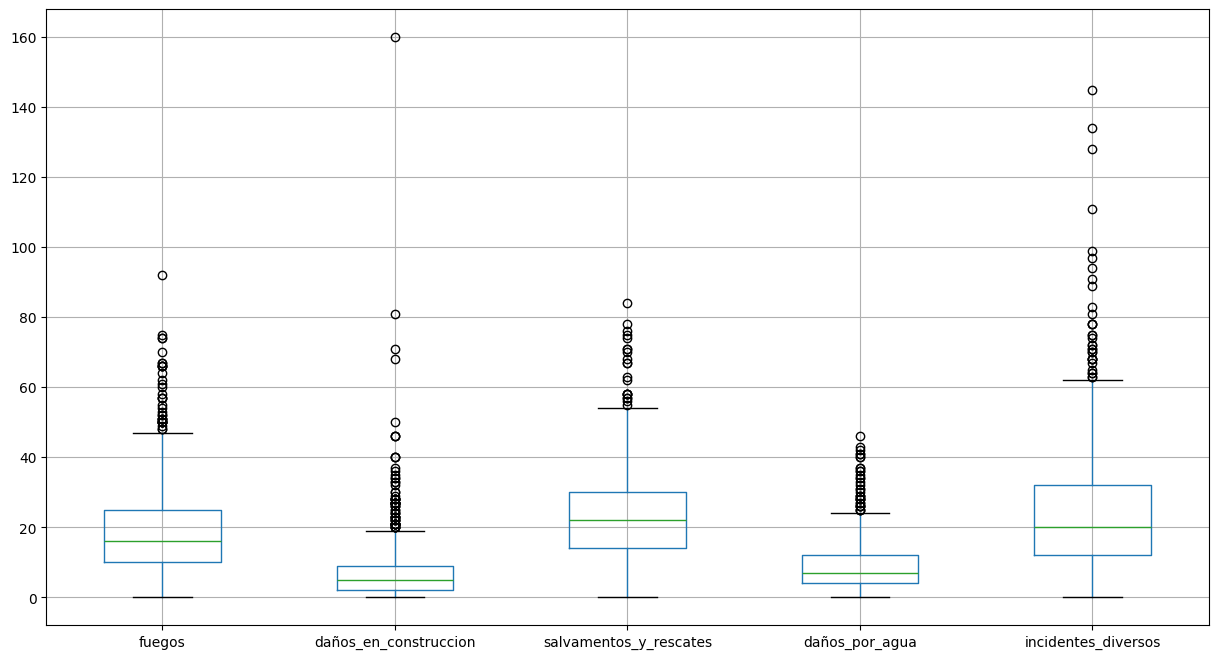

In [12]:
boxplot = pd.DataFrame.boxplot(ds['bomberos'], column=tipoActuacion, figsize=[15, 8])
plt.show()

En este diagrama de cajas conjunto, podemos observar que incidentes diversos es el atributo con mayor dispersión (en cuanto a los límites inferior y superior).

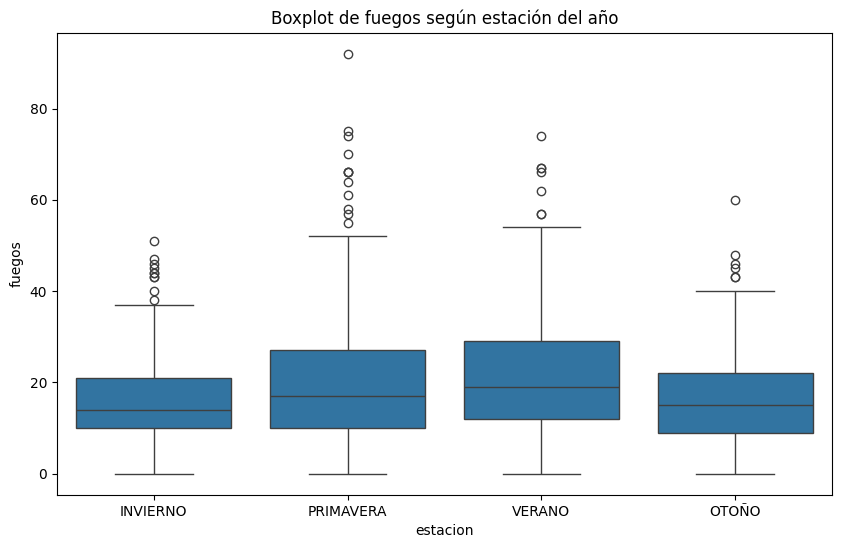

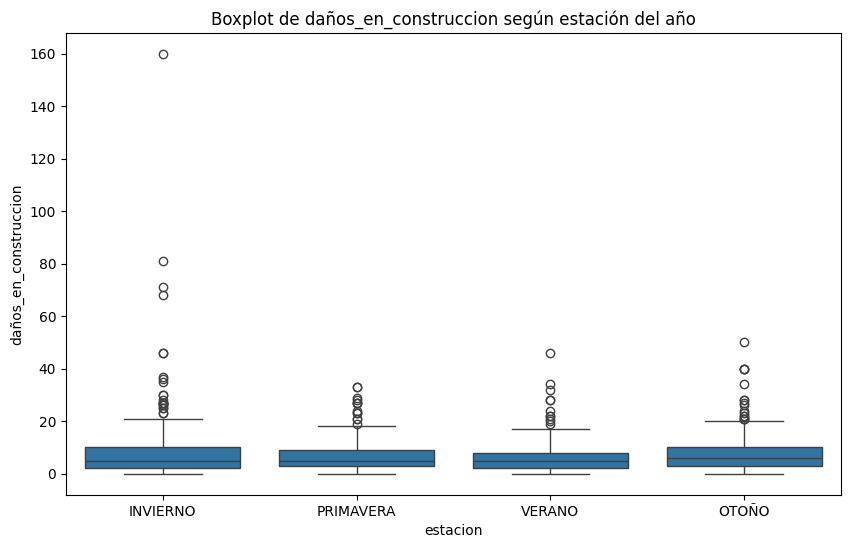

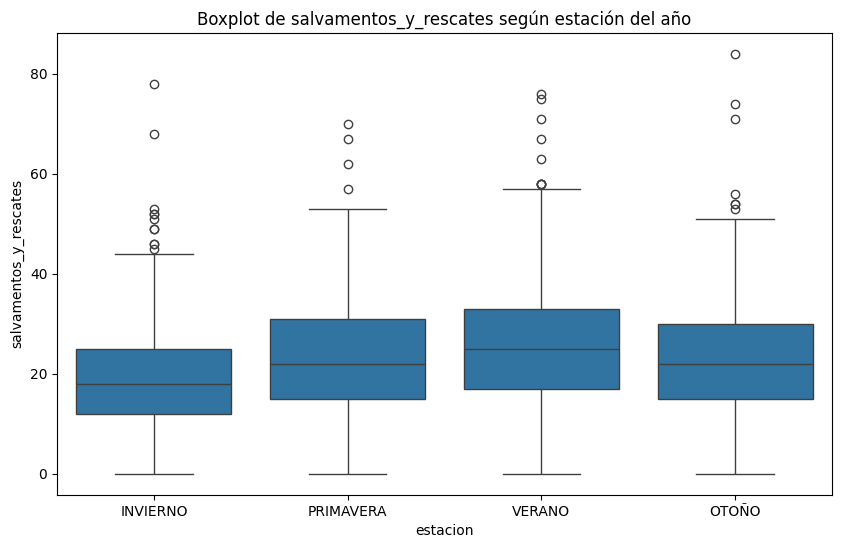

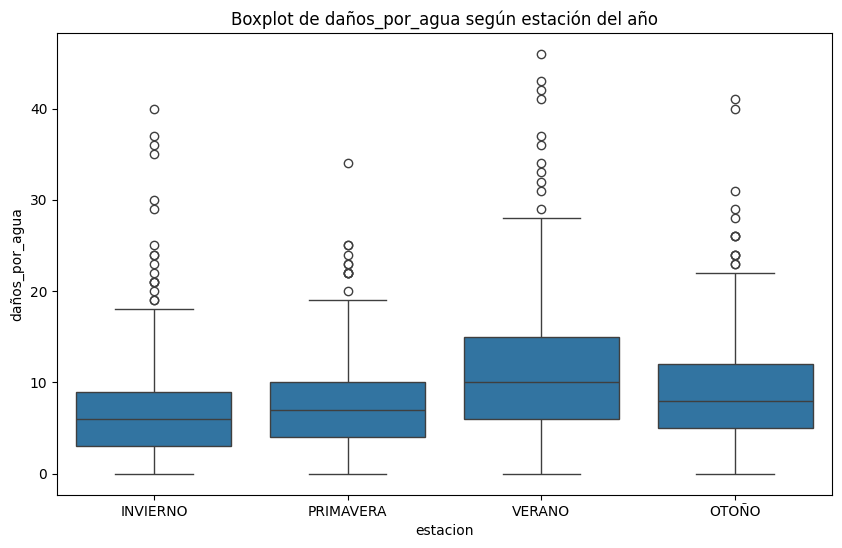

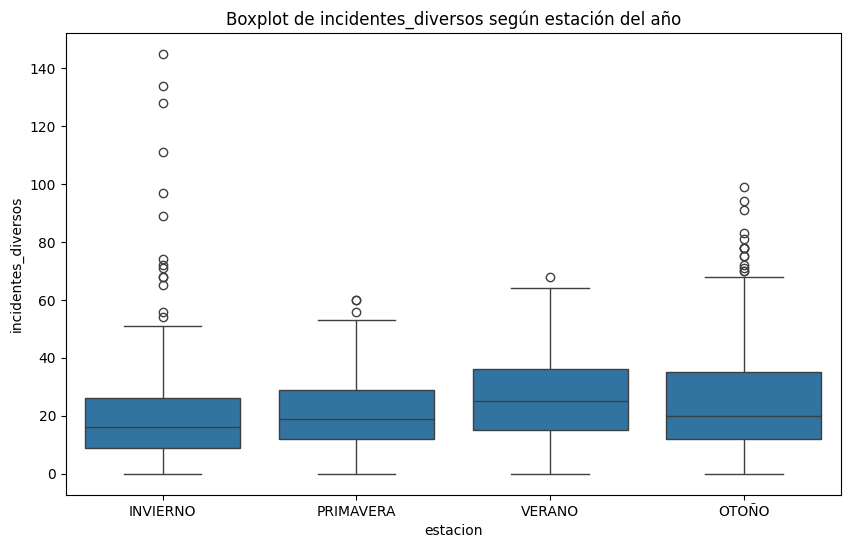

In [13]:
# Create boxplots for each column in each season
for column in tipoActuacion:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='estacion', y=column, data=ds['bomberos'])
    plt.title(f'Boxplot de {column} según estación del año')
    plt.show()

In [14]:
accidentes = ds['accidentalidad']
get_info('accidentalidad')

datetime                0
num_expediente          0
fecha                   0
hora                    0
localizacion            0
cod_distrito            0
distrito                0
tipo_accidente          0
estado_meteorológico    0
tipo_vehiculo           0
tipo_persona            0
rango_edad              0
sexo                    0
cod_lesividad           0
lesividad               0
positiva_alcohol        0
positiva_droga          0
cod_accidente           0
longitud                0
latitud                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195608 entries, 0 to 195607
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   datetime              195608 non-null  object 
 1   num_expediente        195608 non-null  object 
 2   fecha                 195608 non-null  object 
 3   hora                  195608 non-null  object 
 4   localizacion          195608 non-null  

In [15]:
ds['accidentalidad'][NM('accidentalidad')].describe()

,cod_distrito,cod_lesividad,positiva_alcohol,positiva_droga,cod_accidente,longitud,latitud
count,195608.000000,195608.000000,195608.000000,195608.000000,195608.000000,195608.000000,195608.000000
mean,9.866514,11.717890,0.030321,0.003113,4.232475,-3.681908,40.422065
std,5.659024,4.089292,0.171469,0.055711,2.921223,0.040962,0.035369
min,1.000000,1.000000,0.000000,0.000000,0.000000,-3.836688,40.319555
25%,5.000000,7.000000,0.000000,0.000000,2.000000,-3.707792,40.394631
50%,10.000000,14.000000,0.000000,0.000000,5.000000,-3.686003,40.423046
75%,14.000000,14.000000,0.000000,0.000000,6.000000,-3.659475,40.446522
max,21.000000,77.000000,1.000000,1.000000,12.000000,-3.524538,40.609022


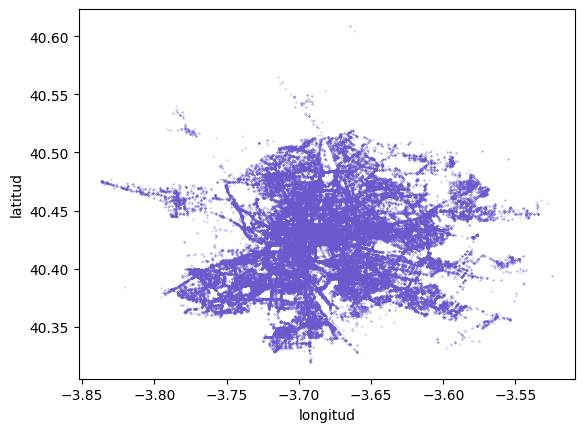

In [16]:
accidentes.plot(kind='scatter', x='longitud', y='latitud', s=0.1, alpha=0.5, color='slateblue')
plt.show()

La mayoría de accidentes se concentran en el centro y dispersan hacia las afueras y zonas menos pobladas.

In [17]:
ds['estacionesCruzadas'][NM('estacionesCruzadas')].describe()

,sentido,longitud,latitud,aforo
count,2.783424e+06,2.783424e+06,2.783424e+06,2.783424e+06
mean,1.467890e+00,-3.126475e+14,3.627401e+14,7.392988e+02
std,4.989680e-01,1.264613e+14,1.182740e+14,1.093716e+03
min,1.000000e+00,-3.736998e+14,4.039706e+07,0.000000e+00
25%,1.000000e+00,-3.707052e+14,4.040596e+14,1.730000e+02
50%,1.000000e+00,-3.690169e+14,4.042223e+14,4.240000e+02
75%,2.000000e+00,-3.641847e+14,4.044683e+14,8.870000e+02
max,2.000000e+00,-3.681941e+06,4.048207e+14,9.999000e+03


In [18]:
get_info('estacionesCruzadas')

datetime    0
nombre      0
sentido     0
longitud    0
latitud     0
aforo       0
orient.     0
hour_str    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783424 entries, 0 to 2783423
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1   nombre    object 
 2   sentido   int64  
 3   longitud  float64
 4   latitud   float64
 5   aforo     int64  
 6   orient.   object 
 7   hour_str  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 169.9+ MB
None


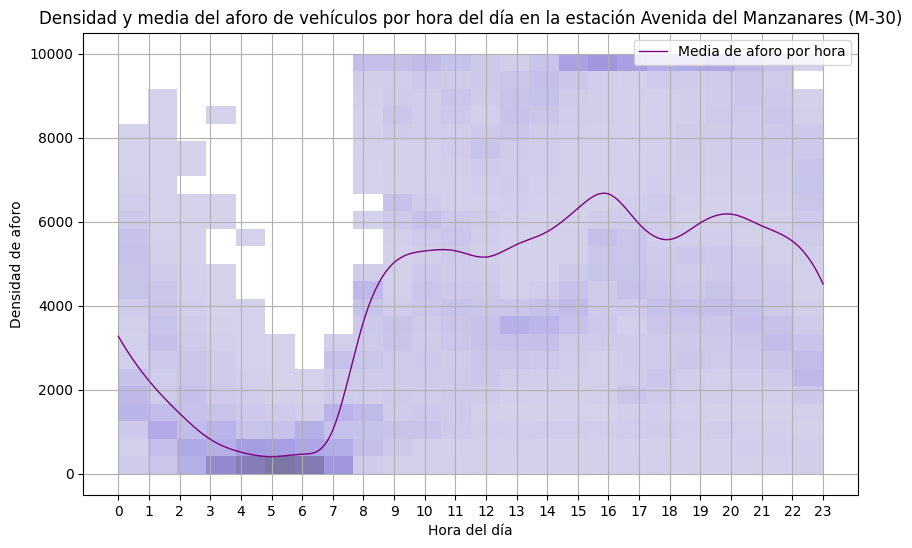

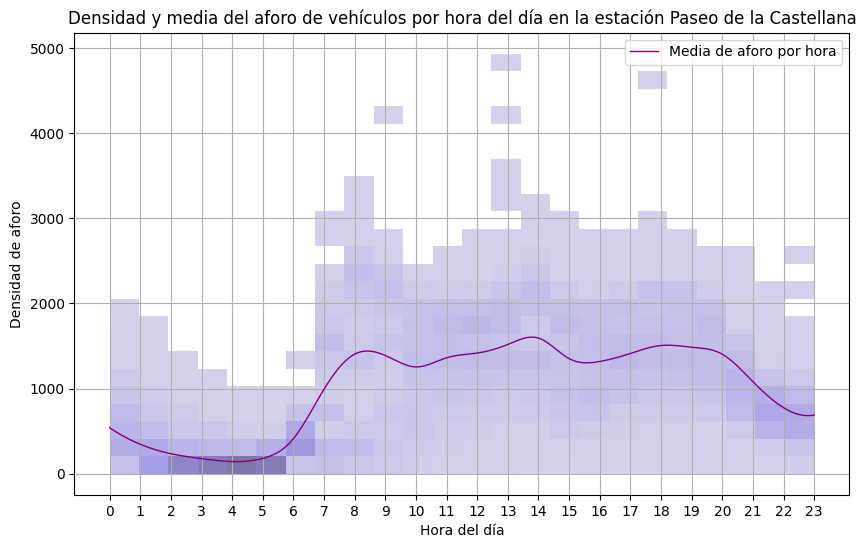

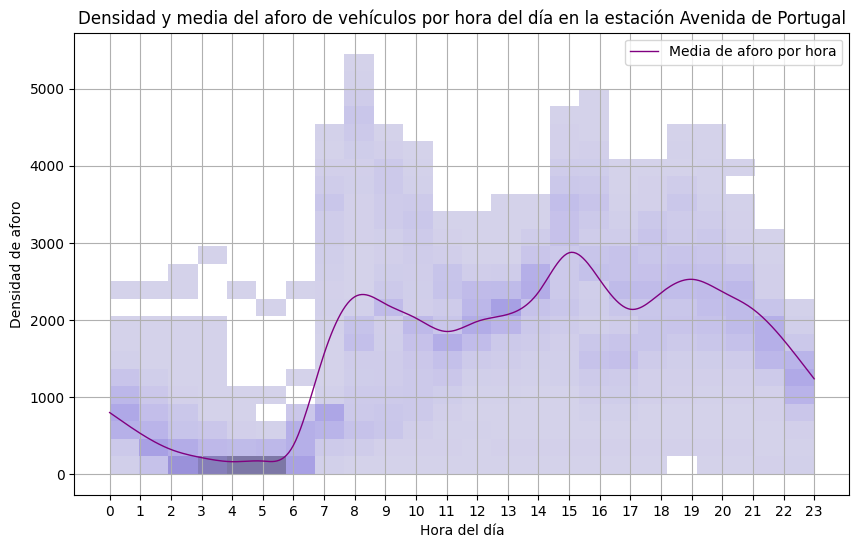

In [19]:
ds['estacionesCruzadas']['hour'] = pd.to_datetime(ds['estacionesCruzadas']['hour_str'], format='%H:%M:%S').dt.hour

# Calcular el aforo total por estación y seleccionar las top 3
top_estaciones = ds['estacionesCruzadas'].groupby('nombre')['aforo'].sum().sort_values(ascending=False).head(3).index

for estacion in top_estaciones:
    plt.figure(figsize=(10, 6))
    # Filtrar los datos para la estación actual
    data = ds['estacionesCruzadas'][(ds['estacionesCruzadas']['nombre'] == estacion) & (ds['estacionesCruzadas']['hour'].notnull())]
    
    # Graficar el histograma de aforo por hora
    sns.histplot(data, x='hour', y='aforo', bins=24, stat='density', kde=True, color='slateblue', alpha=0.75)
    
    # Calcular la media de aforo por hora para la estación actual
    mean_aforo_per_hour = data.groupby('hour')['aforo'].mean().reset_index()
    
    # Preparar los datos para la interpolación spline
    x = mean_aforo_per_hour['hour']
    y = mean_aforo_per_hour['aforo']
    x_new = np.linspace(x.min(), x.max(), 300)  # Generar puntos nuevos para suavizar la curva
    
    # Crear la función spline para suavizar
    spl = make_interp_spline(x, y, k=3)  # k es el grado del spline
    y_smooth = spl(x_new)
    
    # Graficar la línea suavizada de la media de aforo por hora
    plt.plot(x_new, y_smooth, color='purple', linestyle='-', linewidth=1, label='Media de aforo por hora')
    
    plt.title(f'Densidad y media del aforo de vehículos por hora del día en la estación {estacion}')
    plt.xlabel('Hora del día')
    plt.ylabel('Densidad de aforo')
    plt.xticks(range(0, 24))  # Asegura que se muestren todas las horas del día
    plt.grid(True)
    plt.legend()
    plt.show()

Podemos observar que entre las 3 y las 5 am es cuando menos tráfico hay de manera más consistente en las 3 estaciones. También vemos que la estación de Avenida del Manzanares tiene un aforo de mínimo del doble en todos sus puntos con respecto a la siguiente estación más visitada, lo cual no se ve entre la segunda y tercera estación. La hora de  mayor tráfico es además la hora de salida de los colegios y un repunte a la hora de salida del trabajo (20). La estación con más tráfico está situada muy cerca de4l intecambiador de Moncloa, más adelante observaremos en un mapa todas las estaciones.

In [20]:
get_info('direcciones')

cod_via       0
via_clase     0
tipo_ndp      0
cod_ndp       0
distrito      0
barrio        0
cod_postal    0
latitud       0
longitud      0
direccion     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211687 entries, 0 to 211686
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cod_via     211687 non-null  int64  
 1   via_clase   211687 non-null  object 
 2   tipo_ndp    211687 non-null  object 
 3   cod_ndp     211687 non-null  int64  
 4   distrito    211687 non-null  int64  
 5   barrio      211687 non-null  int64  
 6   cod_postal  211687 non-null  int64  
 7   latitud     211687 non-null  float64
 8   longitud    211687 non-null  float64
 9   direccion   211687 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 16.2+ MB
None


Direcciones tiene interés en el cruce con iluminación o accidentes, no por sí solo

In [21]:
get_info('iluminacion')

tipo         0
via_clase    0
distrito     0
barrio       0
longitud     0
latitud      0
direccion    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235466 entries, 0 to 235465
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tipo       235466 non-null  object 
 1   via_clase  235466 non-null  object 
 2   distrito   235466 non-null  int64  
 3   barrio     235466 non-null  int64  
 4   longitud   235466 non-null  float64
 5   latitud    235466 non-null  float64
 6   direccion  235466 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 12.6+ MB
None


In [22]:
get_info('padron')

año                        0
cod_distrito               0
cod_barrio                 0
tipo_vehículo              0
clasificación_ambiental    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180345 entries, 0 to 180344
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   año                      180345 non-null  int64 
 1   cod_distrito             180345 non-null  int64 
 2   cod_barrio               180345 non-null  int64 
 3   tipo_vehículo            180345 non-null  object
 4   clasificación_ambiental  180345 non-null  object
dtypes: int64(3), object(2)
memory usage: 6.9+ MB
None


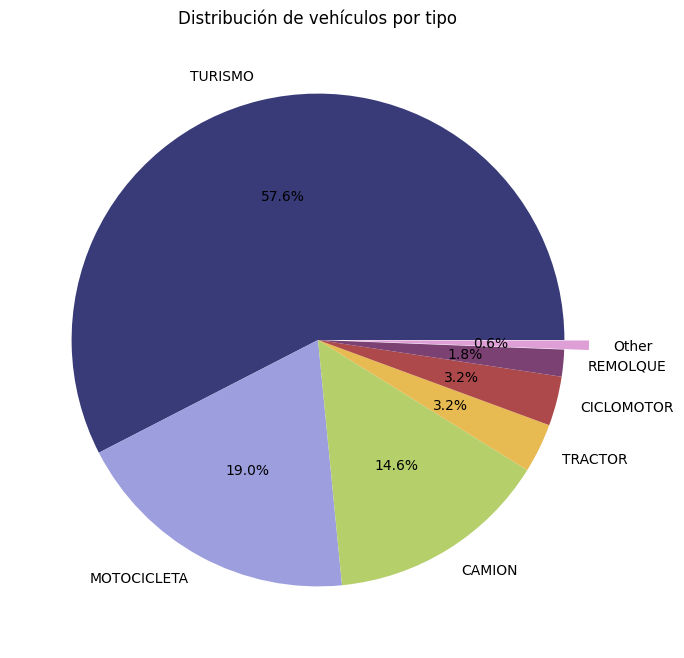

In [23]:
padron = ds['padron']
tipo_vehiculo_counts = padron['tipo_vehículo'].value_counts()

# Combine the two smallest categories into 'Other'
other = tipo_vehiculo_counts.nsmallest(2).sum()
tipo_vehiculo_counts = tipo_vehiculo_counts.nlargest(len(tipo_vehiculo_counts) - 2)
tipo_vehiculo_counts['Other'] = other

# Recalculate number of categories
num_categories = len(tipo_vehiculo_counts)
colors = cmap(np.linspace(0, 1, num_categories))

# Explode the two smallest categories a bit (now combined into 'Other')
explode = [0] * (num_categories - 1) + [0.1]  # Only explode the 'Other' category

# Plotting the pie chart
tipo_vehiculo_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8), colors=colors, explode=explode)

plt.title('Distribución de vehículos por tipo')
plt.ylabel('')
plt.show()

Observamos que el número de turismos supera el 50% de todos los vehículos empadronados en Madrid a 2023

In [24]:
get_info('radares')

radar               0
ubicacion           0
carretara_o_vial    0
pk                  0
sentido             0
tipo                0
longitud            0
latitud             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   radar             29 non-null     int64  
 1   ubicacion         29 non-null     object 
 2   carretara_o_vial  29 non-null     object 
 3   pk                29 non-null     object 
 4   sentido           29 non-null     object 
 5   tipo              29 non-null     object 
 6   longitud          29 non-null     float64
 7   latitud           29 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.9+ KB
None


Hay datos de 29 radares en el término municipal de la ciudad de Madrid

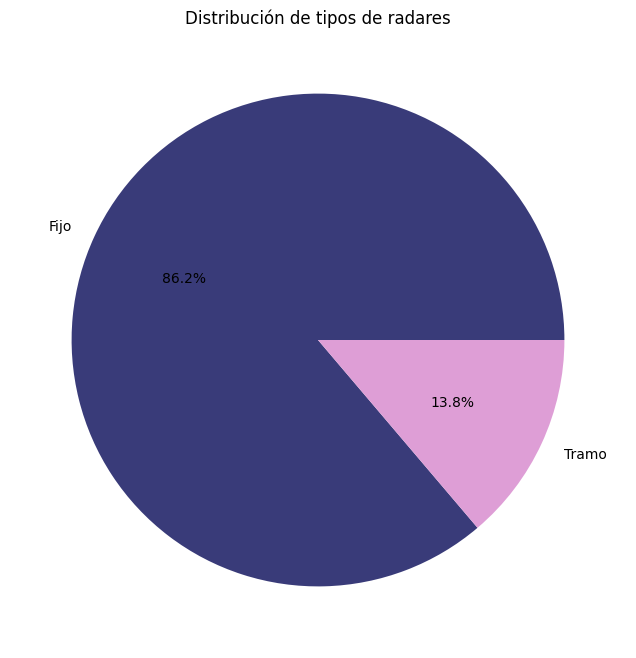

In [25]:
radares = ds['radares']
radares['tipo_agrupado'] = radares['tipo'].apply(lambda x: 'Tramo' if 'tramo' in x.lower() else ('Fijo'))

num_categories = radares['tipo_agrupado'].nunique()

# Generate a list of colors from the colormap
colors = cmap(np.linspace(0, 1, num_categories))

# Plotting with the specified colors
radares['tipo_agrupado'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=colors)
plt.title('Distribución de tipos de radares')
plt.ylabel('')
plt.show()

Hay una proporción mucho más alta de radares fijos que radares de tramo.

### Análisis exploratorio de los datos

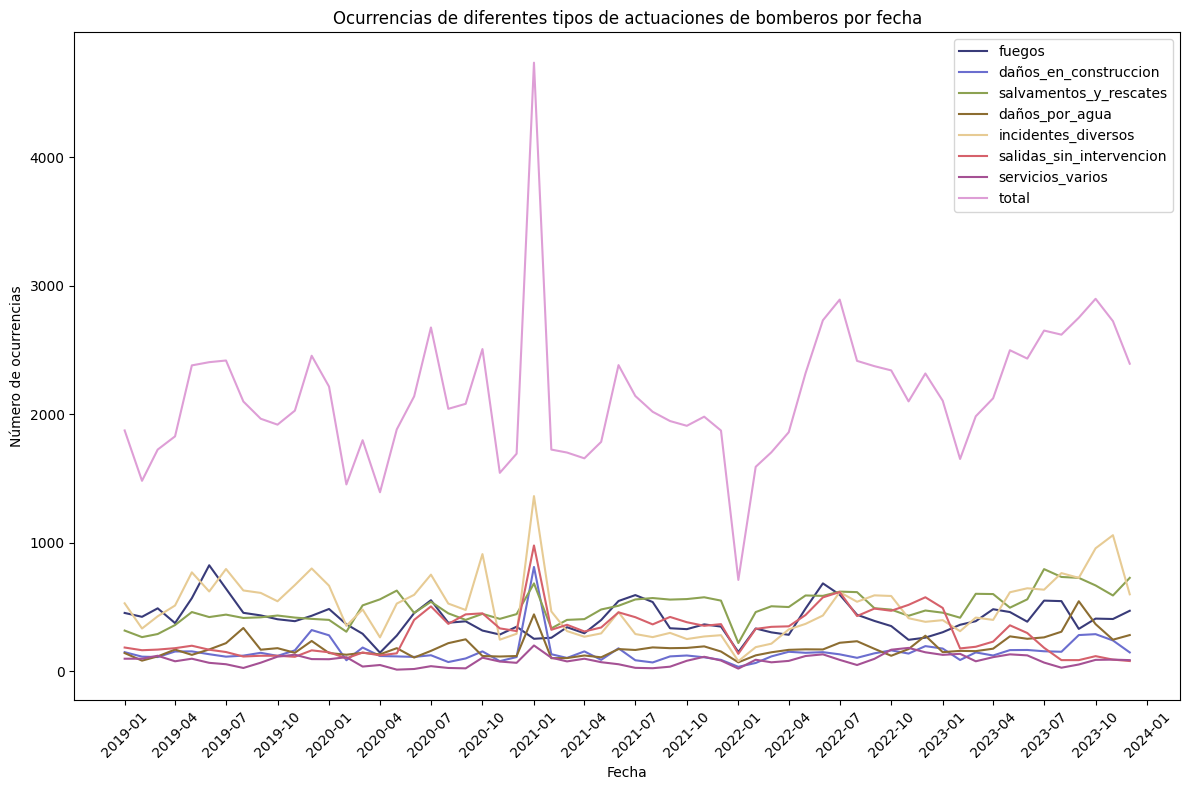

In [26]:
plt.figure(figsize=(12, 8))
categories = ['fuegos', 'daños_en_construccion', 'salvamentos_y_rescates', 'daños_por_agua', 'incidentes_diversos', 'salidas_sin_intervencion', 'servicios_varios', 'total']
ds['bomberos']['date'] = pd.to_datetime(ds['bomberos']['año'].astype(str) + '-' + ds['bomberos']['idMes'].astype(str))

num_categories = len(categories)
colors = cmap(np.linspace(0, 1, num_categories))

for i, category in enumerate(categories):
    grouped_data = ds['bomberos'].groupby('date')[category].sum().reset_index()
    plt.plot(grouped_data['date'], grouped_data[category], label=category, color=colors[i])

plt.title('Ocurrencias de diferentes tipos de actuaciones de bomberos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de ocurrencias')
plt.legend()
plt.xticks(rotation=45)

# Ajustar los xticks para que se muestren solo en enero, abril, julio, y octubre
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()

In [27]:
ds['bomberos'].groupby('date')['total'].sum().reset_index().sort_values(by='total', ascending=False).head(1)


,date,total
24,2021-01-01,4735


Como el tipo de dato fecha está en datetime, sale un día (el 1), pero este valor representa el número de incidencias de todo el mes. Efectivamente podemos observar que este pico ocurre en el mes que se produjo la tormenta Filomena, lo cual es consistente con los datos.

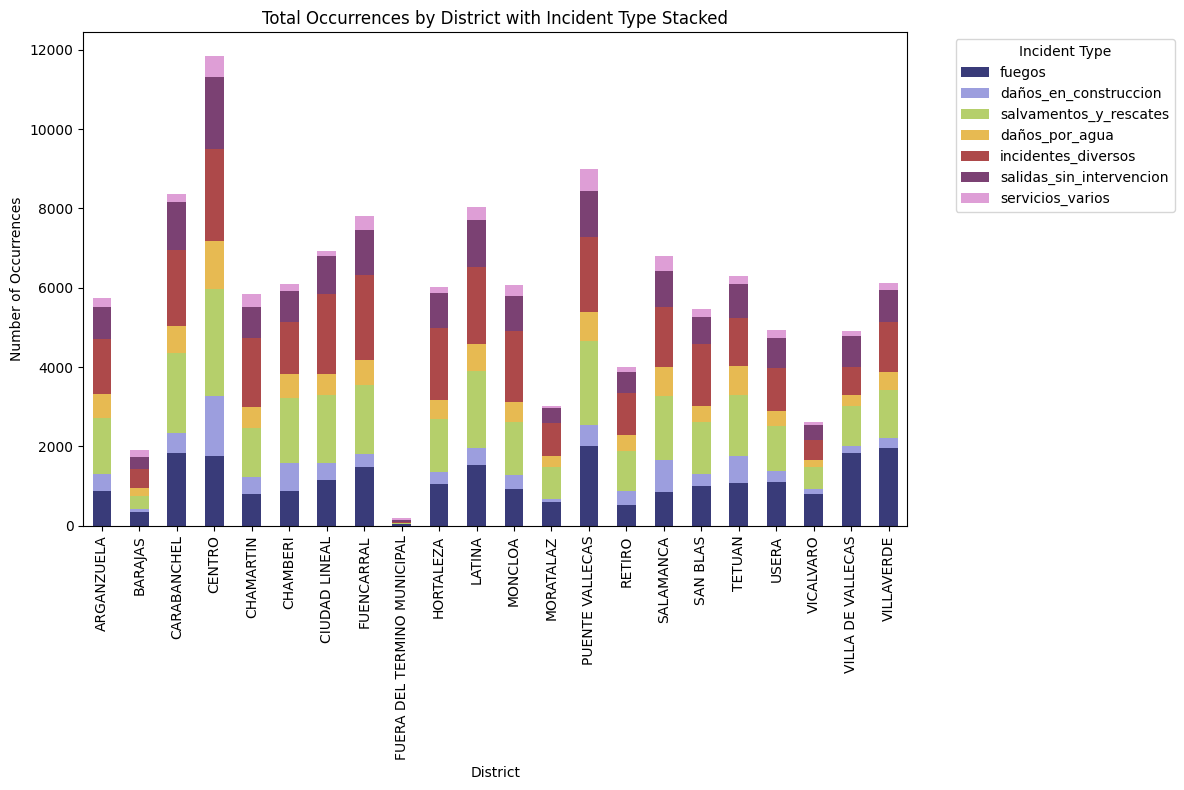

In [28]:
# Identify datetime columns
datetime_cols = ds['bomberos'].select_dtypes(include=['datetime64']).columns

# Start with datetime columns in the list to drop
columns_to_drop = list(datetime_cols)

# Additionally, exclude the 'año' column if it exists
if 'año' in ds['bomberos'].columns:
    columns_to_drop.append('año')

# Exclude the 'idMes' column if it exists
if 'idMes' in ds['bomberos'].columns:
    columns_to_drop.append('idMes')

# Drop identified columns and then group by 'distrito' and sum all incidents
grouped_incidents = ds['bomberos'].drop(columns=columns_to_drop).groupby('distrito').sum()

# Drop the 'total' column if it exists, for the plot
if 'total' in grouped_incidents.columns:
    grouped_incidents.drop('total', axis=1, inplace=True)

# Plotting the total incidents by 'distrito' with incidents stacked by type
grouped_incidents.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20b')
plt.title('Total Occurrences by District with Incident Type Stacked')
plt.xlabel('District')
plt.ylabel('Number of Occurrences')

# Adjust the xtick labels to improve readability
plt.xticks(rotation=90, ha='center')  # Rotate labels to 90 degrees and align them center

plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Tabla comparativa que muestra los accidentes donde la persona que lo ha padecido ha dado positivo en alcohol.

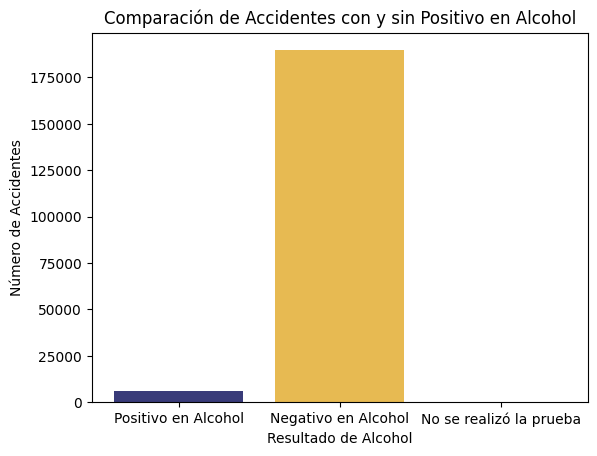

In [29]:
accidentes = ds['accidentalidad']
positivos = accidentes[accidentes['positiva_alcohol'] == 1]
negativos = accidentes[accidentes['positiva_alcohol'] == 0]
labels = ['Positivo en Alcohol', 'Negativo en Alcohol', 'No se realizó la prueba']
values = [len(positivos), len(negativos), len(accidentes) - len(positivos) - len(negativos)]
colors = cmap(np.linspace(0, 1, len(labels)))

plt.bar(labels, values, color=colors)
plt.xlabel('Resultado de Alcohol')
plt.ylabel('Número de Accidentes')
plt.title('Comparación de Accidentes con y sin Positivo en Alcohol')
plt.show()

Tabla comparativo donde la persona que ha padecido el accidente ha dado positivo en drogas.

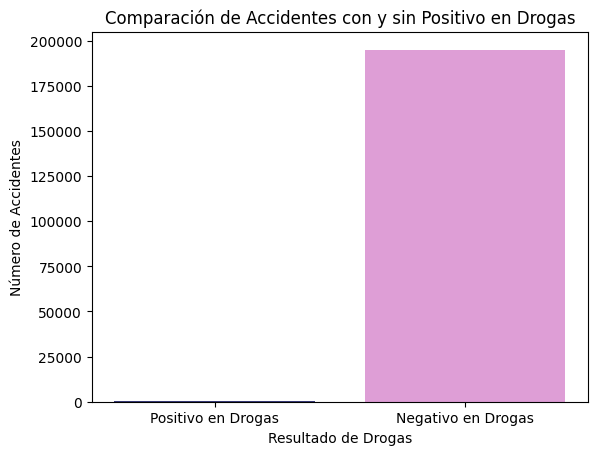

In [30]:
accidentes = ds['accidentalidad']
positivos = accidentes[accidentes['positiva_droga'] == 1]
negativos = accidentes[accidentes['positiva_droga'] == 0]
labels = ['Positivo en Drogas', 'Negativo en Drogas']
values = [len(positivos), len(negativos)]
colors = cmap(np.linspace(0, 1, len(labels)))

plt.bar(labels, values, color=colors)
plt.xlabel('Resultado de Drogas')
plt.ylabel('Número de Accidentes')
plt.title('Comparación de Accidentes con y sin Positivo en Drogas')
plt.show()

Tabla comparativa que relaciona los accidente en los que la persona ha dado positivo en alcohol y drogas

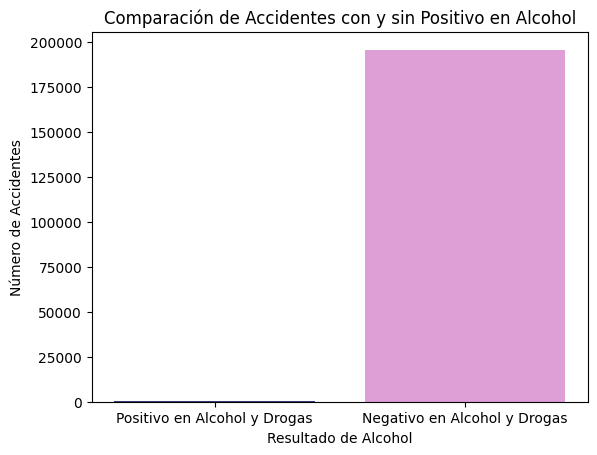

In [31]:
accidentes = ds['accidentalidad']
positivos_alcohol = accidentes[accidentes['positiva_alcohol'] == 1]
positivos_drogas = accidentes[accidentes['positiva_droga'] == 1]
positivos_alcohol_drogas = positivos_alcohol[positivos_alcohol['positiva_droga'] == 1]
positivos_alcohol_drogas = len(positivos_alcohol_drogas)
negativos = len(accidentes) - positivos_alcohol_drogas
labels = ['Positivo en Alcohol y Drogas', 'Negativo en Alcohol y Drogas']
values = [positivos_alcohol_drogas, negativos]
colors = cmap(np.linspace(0, 1, len(labels)))

plt.bar(labels, values, color=colors)
plt.xlabel('Resultado de Alcohol')
plt.ylabel('Número de Accidentes')
plt.title('Comparación de Accidentes con y sin Positivo en Alcohol')
plt.show()

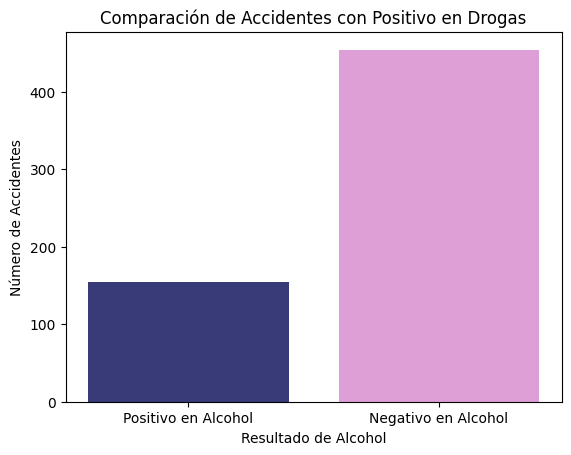

In [32]:
negativos = len(positivos_drogas) - positivos_alcohol_drogas
labels = ['Positivo en Alcohol', 'Negativo en Alcohol']
values = [positivos_alcohol_drogas, negativos]
colors = cmap(np.linspace(0, 1, len(labels)))

plt.bar(labels, values, color=colors)
plt.xlabel('Resultado de Alcohol')
plt.ylabel('Número de Accidentes')
plt.title('Comparación de Accidentes con Positivo en Drogas')
plt.show()

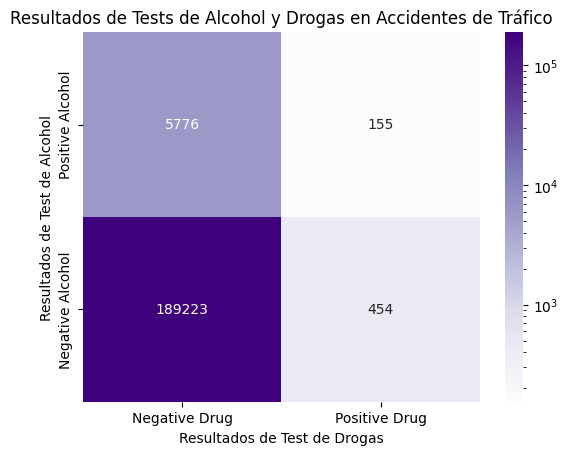

In [33]:
df = ds['accidentalidad']

# Create a new column for each combination
conditions = [
    (df['positiva_alcohol'] == 1) & (df['positiva_droga'] == 0),  # Positive alcohol, Negative drug
    (df['positiva_alcohol'] == 1) & (df['positiva_droga'] == 1),  # Positive both
    (df['positiva_alcohol'] == 0) & (df['positiva_droga'] == 0),  # Negative both
    (df['positiva_alcohol'] == 0) & (df['positiva_droga'] == 1)   # Negative alcohol, Positive drug
]

choices = ['Positive Alcohol, Negative Drug', 'Positive Both', 'Negative Both', 'Negative Alcohol, Positive Drug']
df['Test_Result'] = np.select(conditions, choices, default='Other')

# Count the occurrences of each combination
result_counts = df['Test_Result'].value_counts().reindex(choices, fill_value=0)

# Convert the counts to a 2x2 matrix
matrix = result_counts.values.reshape(2, 2)

sns.heatmap(matrix, cmap='Purples', norm=LogNorm(), annot=True, fmt=".0f",
            xticklabels=['Negative Drug', 'Positive Drug'],
            yticklabels=['Positive Alcohol', 'Negative Alcohol'])
plt.title('Resultados de Tests de Alcohol y Drogas en Accidentes de Tráfico')
plt.xlabel('Resultados de Test de Drogas')
plt.ylabel('Resultados de Test de Alcohol')
plt.show()

In [34]:
del ds['accidentalidad']['Test_Result']
get_info('accidentalidad')

datetime                0
num_expediente          0
fecha                   0
hora                    0
localizacion            0
cod_distrito            0
distrito                0
tipo_accidente          0
estado_meteorológico    0
tipo_vehiculo           0
tipo_persona            0
rango_edad              0
sexo                    0
cod_lesividad           0
lesividad               0
positiva_alcohol        0
positiva_droga          0
cod_accidente           0
longitud                0
latitud                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195608 entries, 0 to 195607
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   datetime              195608 non-null  object 
 1   num_expediente        195608 non-null  object 
 2   fecha                 195608 non-null  object 
 3   hora                  195608 non-null  object 
 4   localizacion          195608 non-null  

In [36]:
distritoDict

{'1': 'CENTRO',
 '11': 'CARABANCHEL',
 '10': 'LATINA',
 '12': 'USERA',
 '9': 'MONCLOA',
 '14': 'MORATALAZ',
 '4': 'SALAMANCA',
 '18': 'VILLA DE VALLECAS',
 '17': 'VILLAVERDE',
 '7': 'CHAMBERI',
 '5': 'CHAMARTIN',
 '16': 'HORTALEZA',
 '15': 'CIUDAD LINEAL',
 '3': 'RETIRO',
 '8': 'FUENCARRAL',
 '19': 'VICALVARO',
 '13': 'PUENTE VALLECAS',
 '21': 'BARAJAS',
 '2': 'ARGANZUELA',
 '6': 'TETUAN',
 '20': 'SAN BLAS',
 '22': 'FUERA DEL TERMINO MUNICIPAL'}

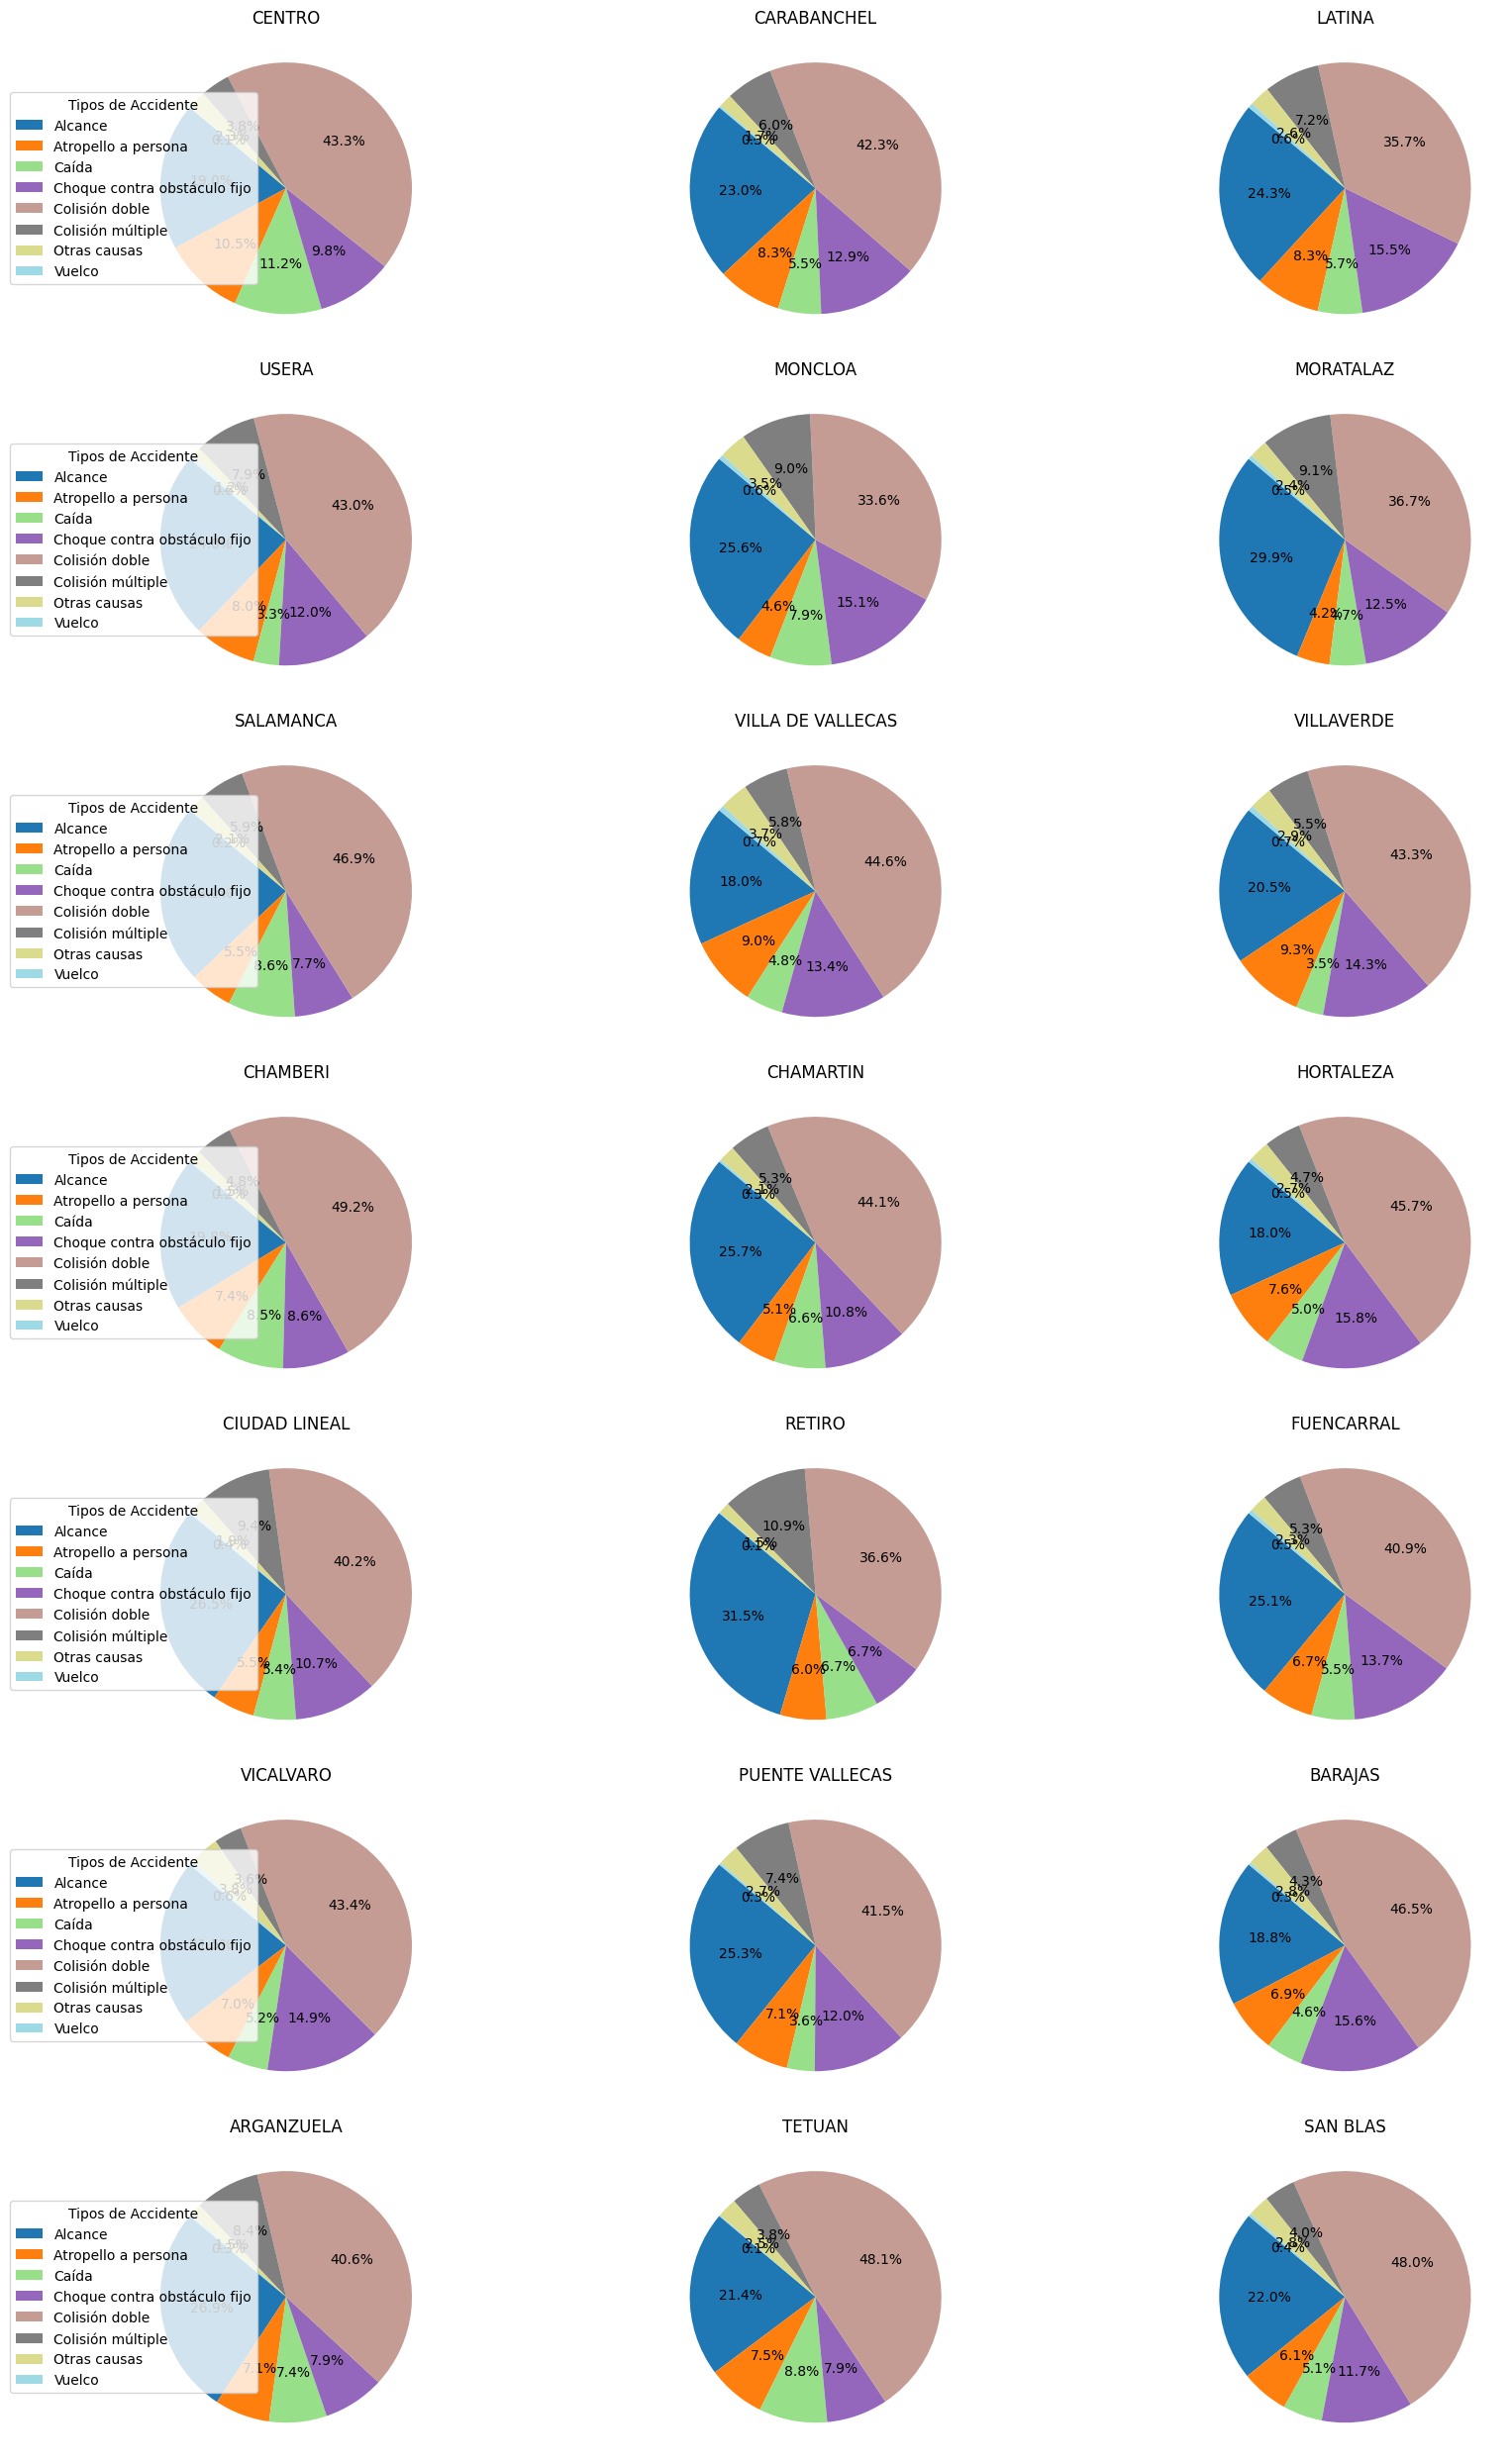

In [38]:
n_filas = 7
n_columnas = 3
distritos = distritoDict.values()
accidentes_por_distrito = accidentes.groupby(['distrito', 'tipo_accidente']).size().reset_index(name='count')

fig, axes = plt.subplots(n_filas, n_columnas, figsize=(20, 25))
fig.subplots_adjust(left=0.00001, hspace=0.3, wspace=0.001)

# Define a colormap
cmap = plt.get_cmap('tab20')  # Example colormap

for i, (ax, distrito) in enumerate(zip(axes.flatten(), distritos)):
    datos_distrito = accidentes_por_distrito[accidentes_por_distrito['distrito'] == distrito]
    
    if not datos_distrito.empty:
        num_categorias = datos_distrito['tipo_accidente'].nunique()
        colors = cmap(np.linspace(0, 1, num_categorias))
        wedges, texts, autotexts = ax.pie(datos_distrito['count'], startangle=140, colors=colors, autopct='%1.1f%%')
        ax.set_title(distrito)
        
        if i % n_columnas == 0:
            handles, labels = zip(*[(w, t) for w, t in zip(wedges, datos_distrito['tipo_accidente'])])
            ax.legend(handles, labels, loc='center left', bbox_to_anchor=(-0.4, 0.5), title="Tipos de Accidente")
    else:
        ax.set_visible(False)

for i in range(len(distritos), n_filas * n_columnas):
    axes.flatten()[i].set_visible(False)

plt.tight_layout()
plt.show()

Todas tienen proporciones muy similares, no llama la atención ninguno en especial.

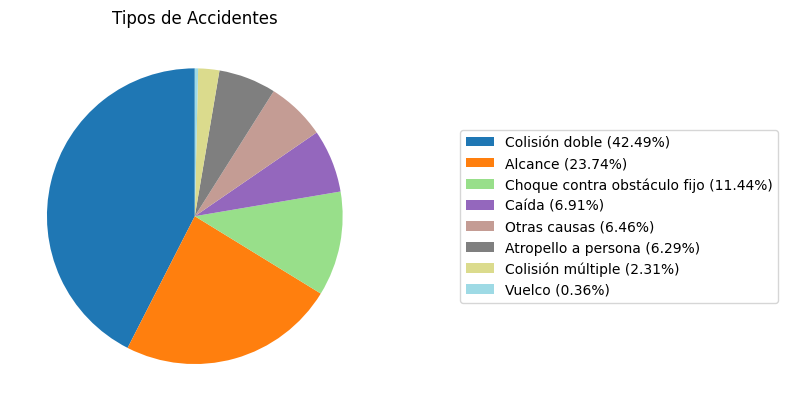

In [39]:
labels = accidentes['tipo_accidente'].unique()
values = accidentes['tipo_accidente'].value_counts()
colors = cmap(np.linspace(0, 1, len(labels)))

percentages = (values / len(accidentes)) * 100

plt.pie(values, startangle=90, colors=colors)
plt.title('Tipos de Accidentes')
legend_labels = [f'{label} ({percentage:.2f}%)' for label, percentage in zip(labels, percentages)]
plt.legend(labels=legend_labels, loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

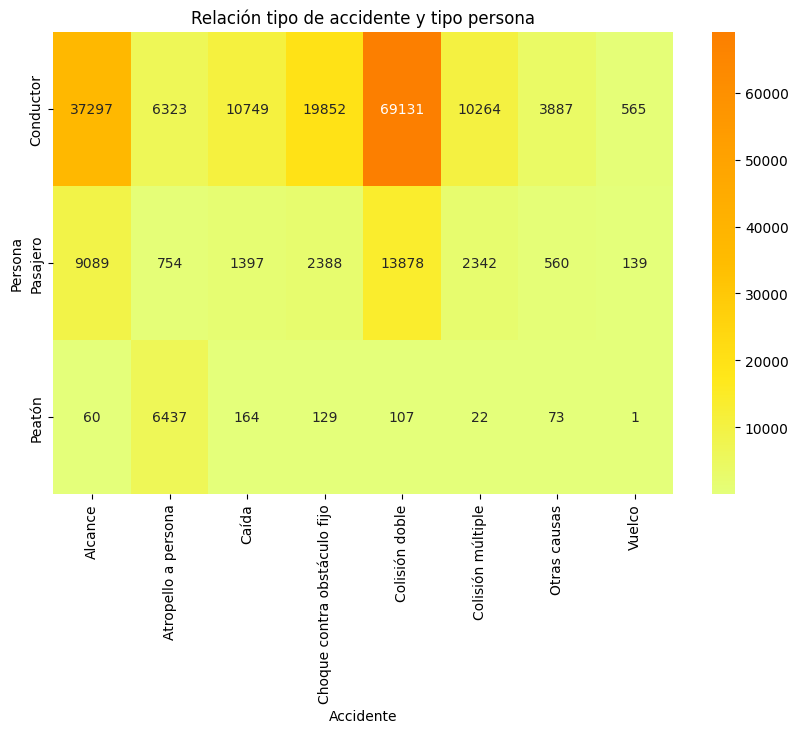

In [40]:
cross_tab = pd.crosstab(accidentes['tipo_persona'], accidentes['tipo_accidente'])

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Wistia', fmt='g')
plt.title('Relación tipo de accidente y tipo persona')
plt.xlabel('Accidente')
plt.ylabel('Persona')

plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_9404\246239208.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_lesividad.index, y=conteo_lesividad.values, ax=axs[i], palette=lesividad_a_color)
C:\Users\paula\AppData\Local\Temp\ipykernel_9404\246239208.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_lesividad.index, y=conteo_lesividad.values, ax=axs[i], palette=lesividad_a_color)
C:\Users\paula\AppData\Local\Temp\ipykernel_9404\246239208.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_lesividad.index, y=c

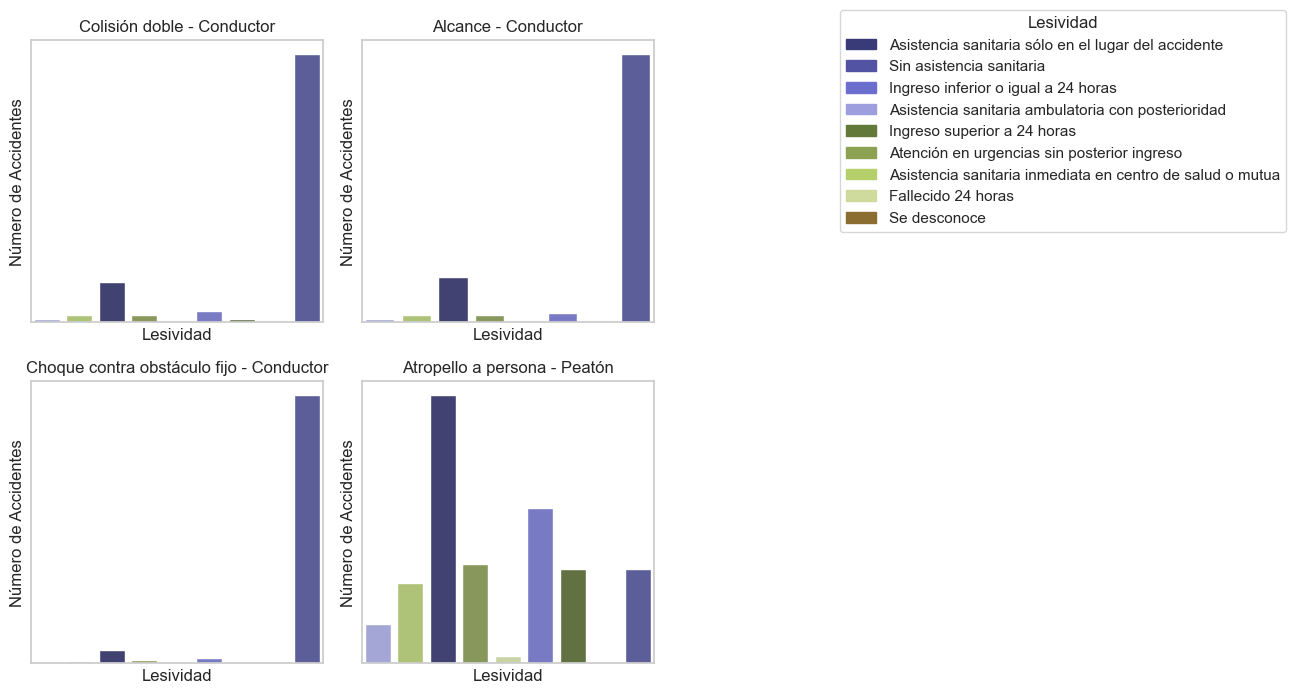

In [41]:
sns.set(style="whitegrid")

# Crear una figura y un conjunto de subgráficos
fig, axs = plt.subplots(2, 2, figsize=(8, 7)) 
axs = axs.flatten() 
combinaciones_deseadas = [    
    ('Colisión doble', 'Conductor'),
    ('Alcance', 'Conductor'),
    ('Choque contra obstáculo fijo', 'Conductor'),
    ('Atropello a persona', 'Peatón')
]

colores_lesividad = sns.color_palette("tab20b", n_colors=accidentes['lesividad'].nunique())
lesividad_a_color = {lesividad: color for lesividad, color in zip(accidentes['lesividad'].unique(), colores_lesividad)}

# Iterar sobre las combinaciones deseadas y crear un gráfico para cada una
for i, (tipo_accidente, tipo_persona) in enumerate(combinaciones_deseadas):
    # Filtrar el DataFrame
    df_filtrado = accidentes[(accidentes['tipo_accidente'] == tipo_accidente) & (accidentes['tipo_persona'] == tipo_persona)]
    
    # Si el DataFrame filtrado está vacío, continuar con la siguiente iteración
    if df_filtrado.empty:
        print(f"No hay datos para {tipo_accidente} - {tipo_persona}")
        continue
    
    conteo_lesividad = df_filtrado['lesividad'].value_counts().sort_index()
    sns.barplot(x=conteo_lesividad.index, y=conteo_lesividad.values, ax=axs[i], palette=lesividad_a_color)
    
    axs[i].set_title(f'{tipo_accidente} - {tipo_persona}')
    axs[i].set_xlabel('Lesividad')
    axs[i].set_ylabel('Número de Accidentes')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

handles = [plt.Rectangle((0,0),1,1, color=lesividad_a_color[lesividad]) for lesividad in lesividad_a_color]
labels = [lesividad for lesividad in lesividad_a_color]

fig.legend(handles, labels, title='Lesividad', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_9404\693922167.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(wrapped_labels)


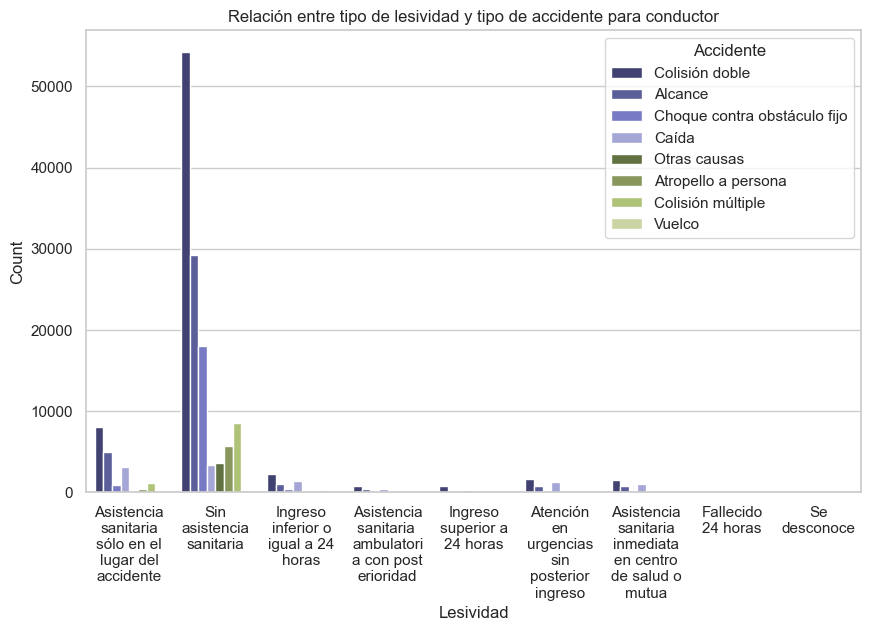

In [42]:
# Filter the DataFrame for cases where TIPO_PERSONA is 'Driver'
df_driver = accidentes[accidentes['tipo_persona'] == 'Conductor']

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=df_driver, x='lesividad', hue='tipo_accidente', palette='tab20b')

# Wrap the x-axis labels
wrapped_labels = [textwrap.fill(label.get_text(), 10) for label in plot.get_xticklabels()]
plot.set_xticklabels(wrapped_labels)

plt.title('Relación entre tipo de lesividad y tipo de accidente para conductor')
plt.xlabel('Lesividad')
plt.ylabel('Count')
plt.legend(title='Accidente')

plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_9404\3510870264.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(wrapped_labels)


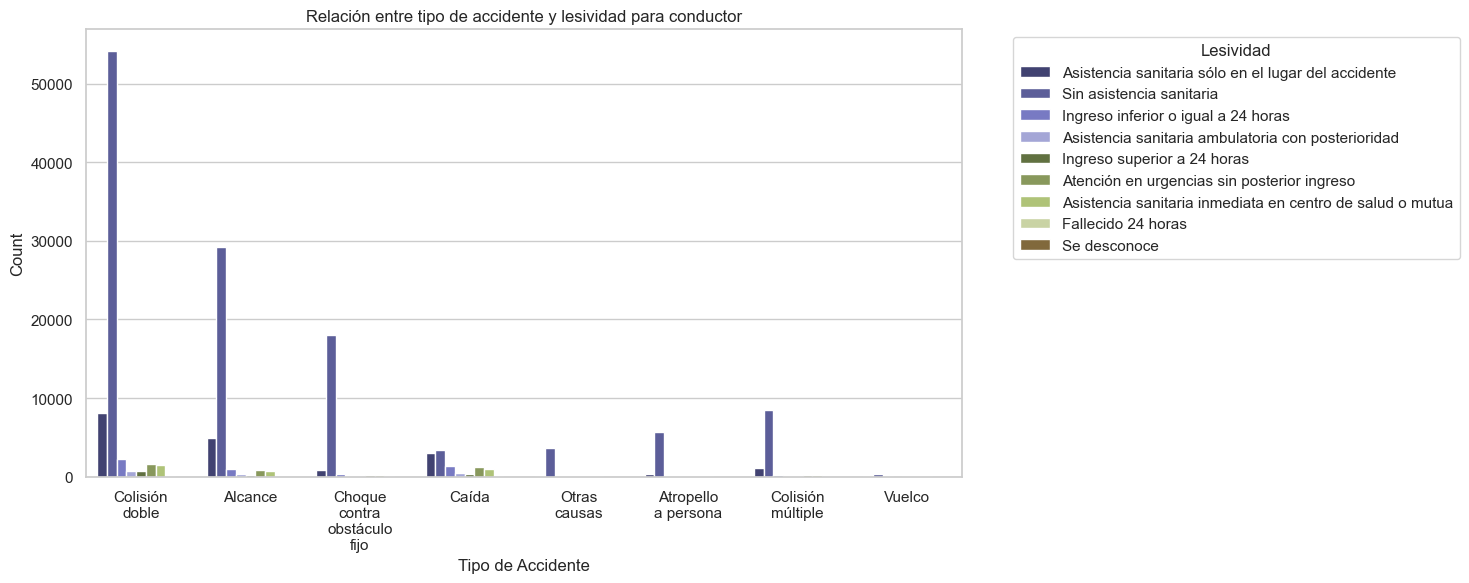

In [43]:
# Filter the DataFrame for cases where TIPO_PERSONA is 'Driver'
df_driver = accidentes[accidentes['tipo_persona'] == 'Conductor']

# Create a grouped bar plot with tipo_accidente and lesividad interchanged
plt.figure(figsize=(15, 6))
plot = sns.countplot(data=df_driver, x='tipo_accidente', hue='lesividad', palette='tab20b')

# Wrap the x-axis labels
wrapped_labels = [textwrap.fill(label.get_text(), 10) for label in plot.get_xticklabels()]
plot.set_xticklabels(wrapped_labels)

plt.title('Relación entre tipo de accidente y lesividad para conductor')
plt.xlabel('Tipo de Accidente')
plt.ylabel('Count')
plt.legend(title='Lesividad', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

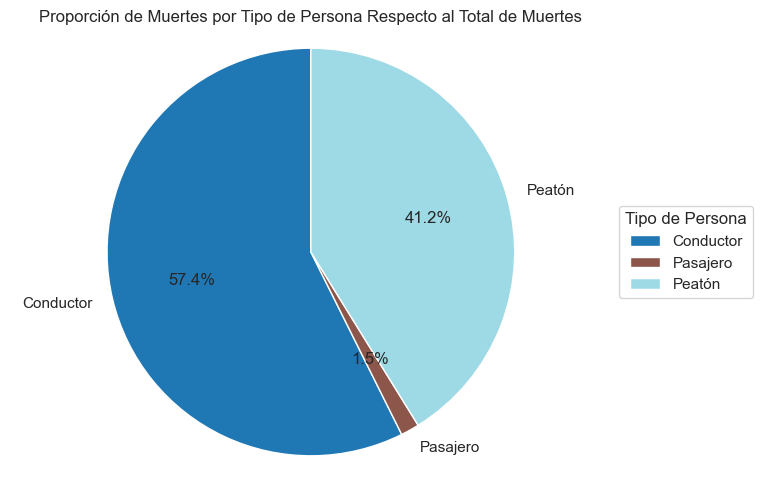

In [44]:
total_muertes = accidentes[accidentes['cod_lesividad'] == 4].shape[0]
muertes_por_grupo = accidentes[accidentes['cod_lesividad'] == 4].groupby('tipo_persona').size()
proporciones = (muertes_por_grupo / total_muertes) * 100

labels = proporciones.index
sizes = proporciones.values
colors = [cmap(i) for i in np.linspace(0, 1, len(labels))]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, startangle=90, colors=colors, autopct='%1.1f%%')
ax.axis('equal')  
plt.tight_layout()

plt.legend(wedges, labels, title="Tipo de Persona", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Proporción de Muertes por Tipo de Persona Respecto al Total de Muertes')
plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_9404\809002751.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(wrapped_labels)


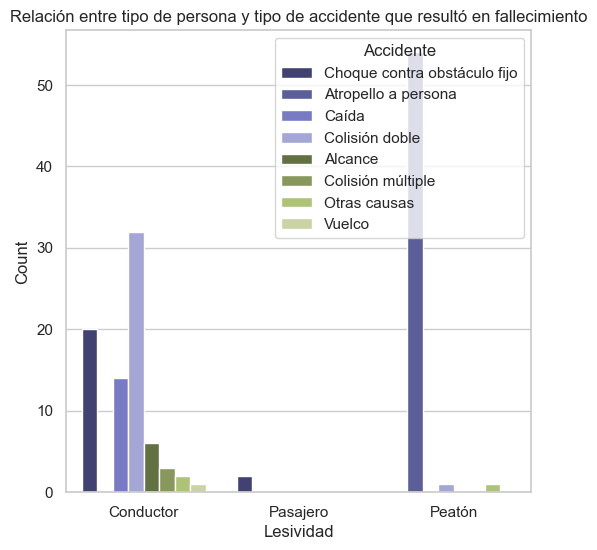

In [45]:
df_dead = accidentes[accidentes['cod_lesividad'] == 4]

plt.figure(figsize=(6, 6))
plot = sns.countplot(data=df_dead, x='tipo_persona', hue='tipo_accidente', palette='tab20b')

# Wrap the x-axis labels
wrapped_labels = [textwrap.fill(label.get_text(), 10) for label in plot.get_xticklabels()]
plot.set_xticklabels(wrapped_labels)

plt.title('Relación entre tipo de persona y tipo de accidente que resultó en fallecimiento')
plt.xlabel('Lesividad')
plt.ylabel('Count')
plt.legend(title='Accidente')

plt.show()

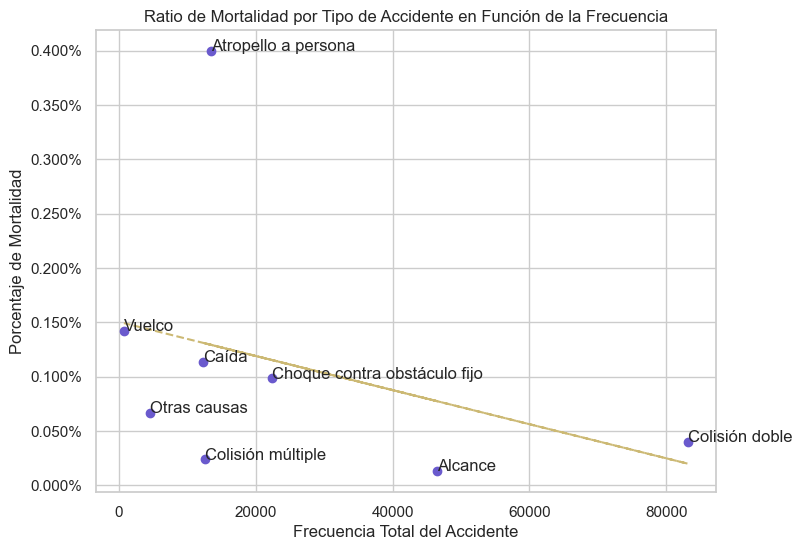

In [46]:
df_conductores = accidentes[accidentes['tipo_persona'] == 'Conductor']

# Agrupar por tipo de accidente y calcular la frecuencia total y los casos mortales
agrupado = accidentes.groupby('tipo_accidente').agg(
    frecuencia_total=pd.NamedAgg(column='tipo_accidente', aggfunc='count'),
    casos_mortales=pd.NamedAgg(column='cod_lesividad', aggfunc=lambda x: (x == 4).sum())
).reset_index()

# Calcular el ratio de mortalidad
agrupado['ratio_mortalidad'] = (agrupado['casos_mortales'] / agrupado['frecuencia_total']) * 100

# Calcular coeficientes de la regresión lineal
z = np.polyfit(agrupado['frecuencia_total'], agrupado['ratio_mortalidad'], 1)
p = np.poly1d(z)

plt.figure(figsize=(8, 6))
plt.plot(agrupado['frecuencia_total'], p(agrupado['frecuencia_total']), "y--")
plt.scatter(agrupado['frecuencia_total'], agrupado['ratio_mortalidad'], color='slateblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Ratio de Mortalidad por Tipo de Accidente en Función de la Frecuencia')
plt.xlabel('Frecuencia Total del Accidente')
plt.ylabel('Porcentaje de Mortalidad')
plt.grid(True)
for i, txt in enumerate(agrupado['tipo_accidente']):
    plt.annotate(txt, (agrupado['frecuencia_total'][i], agrupado['ratio_mortalidad'][i]))
plt.show()

En este gráfico puede observarse que el vuelco es el tipo de accidente más peligroso de todos, aunque sea, también, el menos frecuente (sin tener en cuenta que 'Otras causas' agrupa varias situaciones de menor frecuencia).
En esta tabla, lo que es ideal es que la linea de tendencia haga exactamente lo que está haciendo, es decir, tenga una pendiente negativa cerca del eje de las x. Que sea negativa indica que cuanto más probable es un accidente, menos mortal resulta, mientras que el que sea una pendiente baja (con un corte en las y's baja), muestra que el ratio máximo de mortalidad es generalmente bajo.
Algo que no es tan ideal, es el valor atípico que representa el atropello a personas, aunque es esperable, ya que tiene una incidencia de mortalidad enorme.

C:\Users\paula\AppData\Local\Temp\ipykernel_9404\1621938455.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_peaton, x='estado_meteorológico', palette='tab20b')


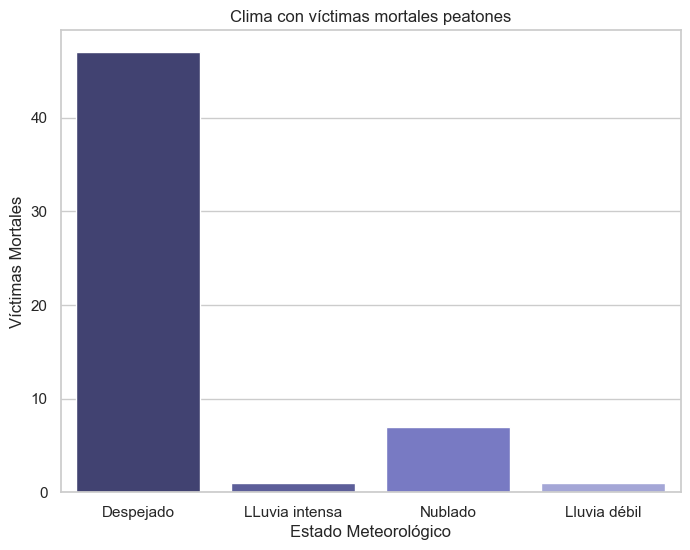

In [47]:
df_peaton = accidentes[(accidentes['tipo_persona'] == 'Peatón') & (accidentes['cod_lesividad'] == 4)]

# Plot the count of ESTADO_METEOROLOGICO
plt.figure(figsize=(8, 6))
sns.countplot(data=df_peaton, x='estado_meteorológico', palette='tab20b')
plt.title('Clima con víctimas mortales peatones')
plt.xlabel('Estado Meteorológico')
plt.ylabel('Víctimas Mortales')
plt.show()

In [48]:
print(accidentes[accidentes['tipo_persona'] == 'Peatón'])

                   datetime num_expediente       fecha      hora  \
170     2019-01-04 22:00:00    2019S000247  2019-01-04  22:00:00   
202     2019-01-05 11:37:00    2019S000355  2019-01-05  11:37:00   
244     2019-01-02 13:50:00    2019S000481  2019-01-02  13:50:00   
273     2019-01-04 16:00:00    2019S000513  2019-01-04  16:00:00   
280     2019-01-05 19:48:00    2019S000579  2019-01-05  19:48:00   
...                     ...            ...         ...       ...   
195525  2023-08-31 12:14:00    2023S028281  2023-08-31  12:14:00   
195546  2023-08-31 14:50:00    2023S028294  2023-08-31  14:50:00   
195567  2023-08-31 19:10:00    2023S028314  2023-08-31  19:10:00   
195587  2023-08-31 21:41:00    2023S028326  2023-08-31  21:41:00   
195589  2023-08-31 21:19:00    2023S028327  2023-08-31  21:19:00   

                                             localizacion  cod_distrito  \
170                AVDA  DE PABLO IGLESIAS FAROLA Nº 27 7             7   
202                    CALL. JAIM

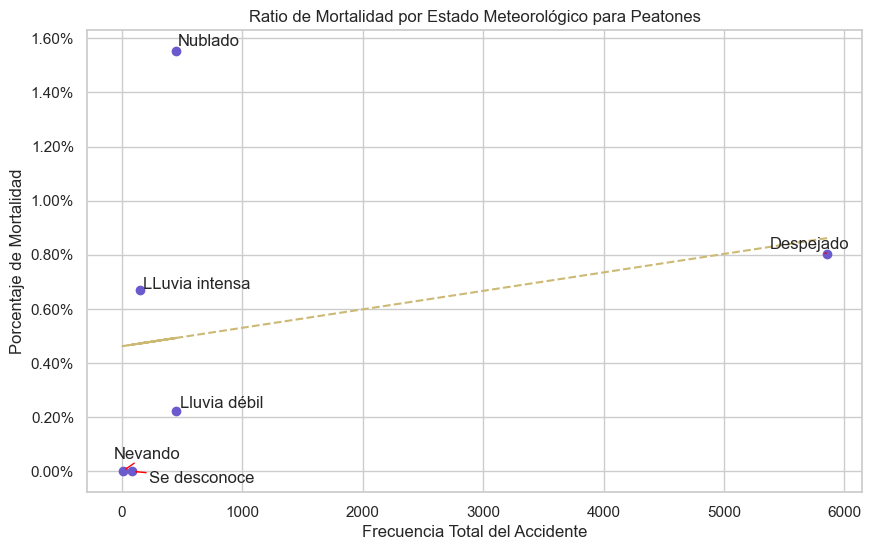

In [49]:
df_peatones = accidentes[accidentes['tipo_persona'] == 'Peatón']

agrupado = df_peatones.groupby('estado_meteorológico').agg(
    frecuencia_total=pd.NamedAgg(column='estado_meteorológico', aggfunc='count'),
    casos_mortales=pd.NamedAgg(column='cod_lesividad', aggfunc=lambda x: (x == 4).sum())
).reset_index()

# Calcular el ratio de mortalidad
agrupado['ratio_mortalidad'] = (agrupado['casos_mortales'] / agrupado['frecuencia_total']) * 100

# Calcular coeficientes de la regresión lineal
z = np.polyfit(agrupado['frecuencia_total'], agrupado['ratio_mortalidad'], 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.plot(agrupado['frecuencia_total'], p(agrupado['frecuencia_total']), "y--")
plt.scatter(agrupado['frecuencia_total'], agrupado['ratio_mortalidad'], color='slateblue')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Ratio de Mortalidad por Estado Meteorológico para Peatones')
plt.xlabel('Frecuencia Total del Accidente')
plt.ylabel('Porcentaje de Mortalidad')
plt.grid(True)

texts = []
for i, txt in enumerate(agrupado['estado_meteorológico']):
    texts.append(plt.annotate(txt, (agrupado['frecuencia_total'][i], agrupado['ratio_mortalidad'][i])))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.show()

Aquí, por otro lado, puede observarse varias cosas. Por un lado, que un clima nublado es 2 veces más peligroso para un peatón que un estado despejado (el habitual en Madrid -75%). También que con lluvia intensa, es 3 veces y media más probable que halla un accidente mortal para un peatón que con lluvia débil. Por último, la tendencia de la línea es positiva, lo cual no es bueno, pero sigue siendo relativamente baja, lo cual sí lo es, como se ha explicado previamente.

In [50]:
direcciones = ds['direcciones']

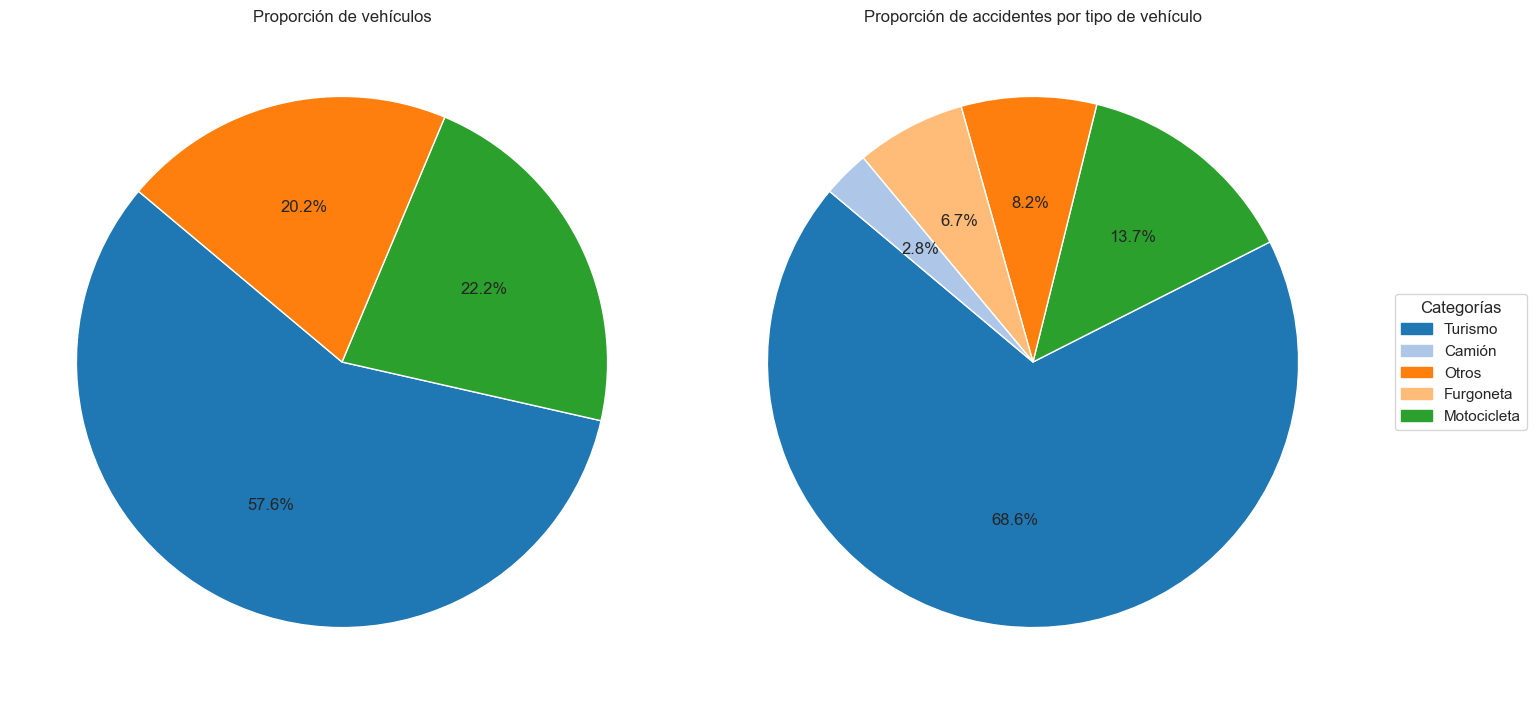

In [51]:
padron['tipo_vehículo'] = padron['tipo_vehículo'].str.lower()
accidentes['tipo_vehiculo'] = accidentes['tipo_vehiculo'].str.lower()
def categorize_vehicle_type(x):
    if 'moto' in x:
        return 'Motocicleta'
    elif 'camión' in x:
        return 'Camión'
    elif x in ['turismo', 'furgoneta']:
        return x
    else:
        return 'otros'

# Aplicar la categorización nuevamente por si acaso
padron['tipo_vehículo'] = padron['tipo_vehículo'].apply(categorize_vehicle_type)
accidentes['tipo_vehiculo'] = accidentes['tipo_vehiculo'].apply(categorize_vehicle_type)

# Recalcular conteos y etiquetas
grouped_vehicle_counts = padron['tipo_vehículo'].value_counts()
labels1 = grouped_vehicle_counts.index
values2 = accidentes['tipo_vehiculo'].value_counts()
labels2 = values2.index

unique_labels = list(set(labels1) | set(labels2))  # Unión de etiquetas de ambos gráficos
colors = plt.cm.tab20(range(len(unique_labels)))  # Generar colores para cada etiqueta única
color_map = dict(zip(unique_labels, colors))  # Mapear cada etiqueta a un color

# Aplicar la paleta de colores a los datos de los gráficos
colors1 = [color_map[label] for label in labels1]
colors2 = [color_map[label] for label in labels2]

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Primer gráfico de tarta - Proporción de vehículos
axs[0].pie(grouped_vehicle_counts, autopct='%1.1f%%', startangle=140, colors=colors1)
axs[0].set_title('Proporción de vehículos')

# Segundo gráfico de tarta - Proporción de accidentes por tipo de vehículo
axs[1].pie(values2, autopct='%1.1f%%', startangle=140, colors=colors2)
axs[1].set_title('Proporción de accidentes por tipo de vehículo')

legend_handles = [mpatches.Patch(color=color_map[label], label=label.capitalize()) for label in unique_labels]

# Añadir la leyenda al gráfico con los handles creados
fig.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), title="Categorías")

plt.tight_layout()
plt.show()

Aquí se puede observar que estadísticamente, las motos tienen menos accidentes en proporción que los turismos, lo cual es sorprendente.

In [52]:
accidentes = ds['accidentalidad']
accidentes['hora_decimal'] = pd.to_datetime(accidentes['hora'], format='%H:%M:%S').dt.hour + pd.to_datetime(accidentes['hora'], format='%H:%M:%S').dt.minute / 60 + pd.to_datetime(accidentes['hora'], format='%H:%M:%S').dt.second / 3600
accidentes.to_csv('limpios/accidentalidad.csv', index=False)

C:\Users\paula\AppData\Local\Temp\ipykernel_9404\2211196954.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='horaH', y='lesividad_group', data=severity_by_hour, palette='tab20b')


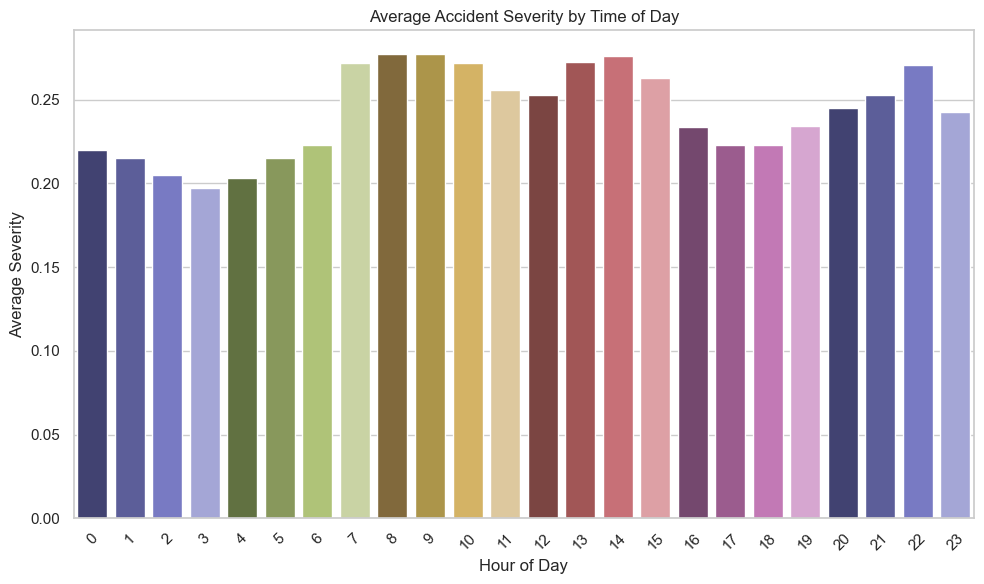

In [53]:
accidentes['horaH'] = pd.to_datetime(accidentes['hora'], format='%H:%M:%S').dt.hour
lesividad_groups = {
    'Atención en urgencias sin posterior ingreso': 1,
    'Ingreso inferior o igual a 24 horas': 1,
    'Ingreso superior a 24 horas.': 2,
    'Fallecido 24 horas': 3,
    'Asistencia sanitaria ambulatoria con posterioridad': 1,
    'Asistencia sanitaria inmediata en centro de salud o mutua': 1,
    'Asistencia sanitaria sólo en el lugar del accidente': 1,
    'Se desconoce': -1,
    'Sin asistencia sanitaria': 0
}
accidentes['lesividad_group'] = accidentes['lesividad'].map(lesividad_groups)
accidentes = accidentes[accidentes['lesividad_group'] != -1]
severity_by_hour = accidentes.groupby('horaH')['lesividad_group'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='horaH', y='lesividad_group', data=severity_by_hour, palette='tab20b')
plt.title('Average Accident Severity by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_9404\1558108676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes['lesividad_group'] = accidentes['lesividad'].map(lesividad_groups)


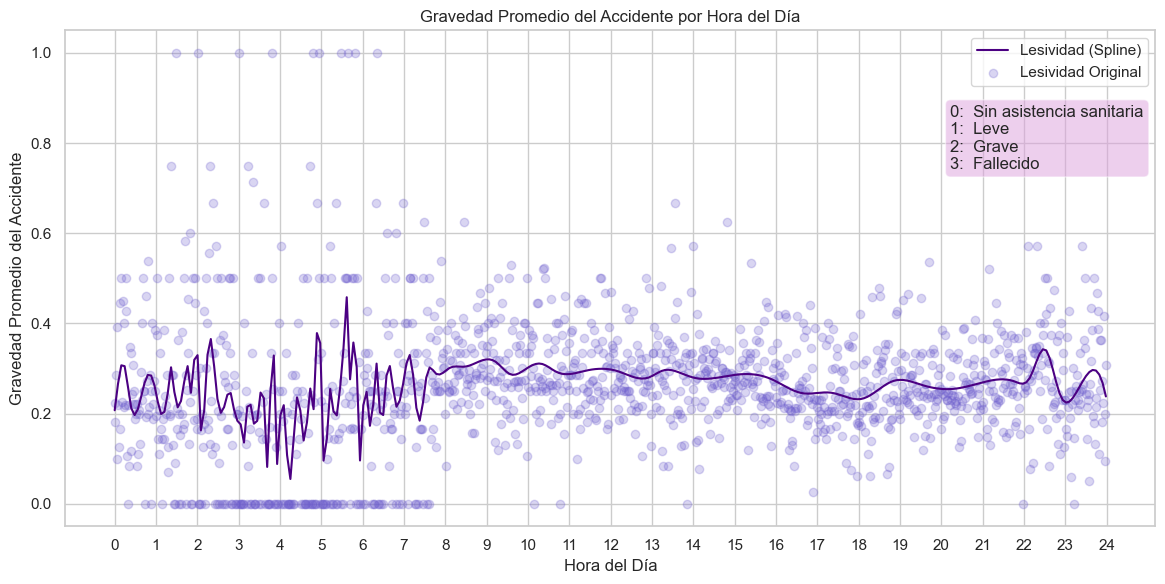

In [54]:
lesividad_groups = {
    'Atención en urgencias sin posterior ingreso': 1,
    'Ingreso inferior o igual a 24 horas': 1,
    'Ingreso superior a 24 horas.': 2,
    'Fallecido 24 horas': 3,
    'Asistencia sanitaria ambulatoria con posterioridad': 1,
    'Asistencia sanitaria inmediata en centro de salud o mutua': 1,
    'Asistencia sanitaria sólo en el lugar del accidente': 1,
    'Se desconoce': -1,
    'Sin asistencia sanitaria': 0
}
accidentes['lesividad_group'] = accidentes['lesividad'].map(lesividad_groups)
accidentesF = accidentes[accidentes['lesividad_group'] != -1]
severity_by_hour_decimal = accidentesF.groupby('hora_decimal')['lesividad_group'].mean().reset_index()
severity_by_hour_decimal['lesividad_smooth'] = severity_by_hour_decimal['lesividad_group'].rolling(window=3, center=True).mean()
x = severity_by_hour_decimal['hora_decimal']
y = severity_by_hour_decimal['lesividad_group']

# Crear la función spline con un parámetro de suavizado s
spline = UnivariateSpline(x, y, s=25)

# Generar puntos x más finos para una curva suave
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = spline(x_smooth)

# Graficar la curva suavizada
plt.figure(figsize=(12, 6))
plt.plot(x_smooth, y_smooth, 'indigo', label='Lesividad (Spline)')
plt.scatter(x, y, color='slateblue', marker='o', label='Lesividad Original', alpha=0.25)
plt.title('Gravedad Promedio del Accidente por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Gravedad Promedio del Accidente')
plt.grid(True)
plt.xticks(range(0, 25))
plt.legend()

textstr = '\n'.join((
    '0:  Sin asistencia sanitaria',
    '1:  Leve',
    '2:  Grave',
    '3:  Fallecido'))

props = dict(boxstyle='round', facecolor='plum', alpha=0.5)
plt.text(0.812, 0.85, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

Se puede observar que, si bien durante el día los valores medios son relativamente estables, es por la noche cuando estos valores son más dispersos, dando a entender que hay gran variabilidad en la gravedad del accidente en la madrugada.

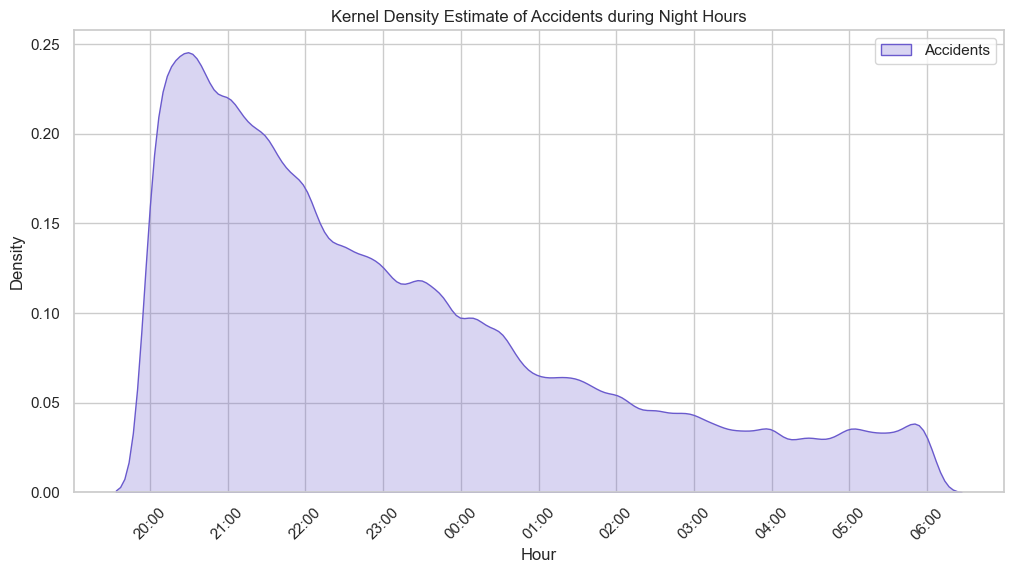

In [55]:
#estacionesCruzadas = ds['estacionesCruzadas']
#estacionesCruzadas['hora_decimal'] = pd.to_datetime(estacionesCruzadas['hour_str'], format='%H:%M:%S').dt.hour + pd.to_datetime(estacionesCruzadas['hour_str'], format='%H:%M:%S').dt.minute / 60 + pd.to_datetime(estacionesCruzadas['hour_str'], format='%H:%M:%S').dt.second / 3600

night_accidents = accidentes[(accidentes['hora_decimal'] >= 20) | (accidentes['hora_decimal'] <= 6)]
adjusted_hours = night_accidents['hora_decimal'].apply(lambda x: x if x >= 20 else x + 24)
#traffic_night = estacionesCruzadas[(estacionesCruzadas['hora_decimal'] >= 20) | (estacionesCruzadas['hora_decimal'] <= 6)]
#adjusted_hours_traffic = traffic_night['hora_decimal'].apply(lambda x: x if x >= 20 else x + 24)

# Crear la figura
plt.figure(figsize=(12, 6))

# Graficar los accidentes nocturnos
sns.kdeplot(adjusted_hours, fill=True, color='slateblue', bw_adjust=0.5, label='Accidents')

# Graficar el tráfico nocturno en la misma figura, utilizando 'aforo' como pesos
#sns.kdeplot(adjusted_hours_traffic, fill=True, color='goldenrod', bw_adjust=3, weights=traffic_night['aforo'], label='Traffic')

# Ajustar las marcas y etiquetas del eje x
x_ticks = list(range(20, 24)) + list(range(24, 31))
x_labels = [f'{hour % 24:02d}:00' for hour in range(20, 24)] + [f'{hour % 24:02d}:00' for hour in range(0, 7)]
plt.xticks(x_ticks, x_labels)

# Añadir título, etiquetas y leyenda
plt.title('Kernel Density Estimate of Accidents during Night Hours')
plt.xlabel('Hour')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()

Como se puede observar, esa dispersión en la gravedad de los accidentes -especialmente a partir de la 1am- la cantidad de accidentes se reduce significativamente.